In [1]:
import pandas as pd
import os
import sys
import seaborn as sns


import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utilities.constants import PRETTY_NAMES

In [2]:
import json
utility = 'COMET'

models = [
    'basic_model',
    'last_hidden_state_model',
    'token_statistics_model',
    'full_dec_model',
    'full_dec_no_stat_model',
    'comet_model',
    'full_dec_comet_model'
]


ms = [
    1,2,3,4,5,10,25,50, 100
]



def load_results_models(models, utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for model in models:
        summary_ref = base + model + '/summary.json'
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[model] = summary
    return results




def load_result_basic_ref_model_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in ms:
        summary_ref = base + 'basic_reference_model_{}/summary.json'.format(m)
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results

load_result_basic_ref_model_estimate
def load_result_m_mc_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in ms:
        summary_ref = base + '{}_mc_estimate/summary.json'.format(m)
        print()
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results

def load_result_unigram_model_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in [1,2,3,4,5]:
        summary_ref = base + 'unigram_count_model_{}/summary.json'.format(m)
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results

def get_beam_search_results():
    ref = '../results/beam/summary.json'
    
    with open(ref, 'r') as f:
        summary = json.load(f)
    return summary
  
def get_result_1000_mc_estimate(utility='unigram-f1'):
    ref = '../results/{}/1000_mc_summary.json'.format(utility)

    with open(ref, 'r') as f:
        summary = json.load(f)
    return summary
  



In [3]:
from cycler import cycler
import itertools
def graph_results(models, utility, statistic, title,  statistic_name='', y_log=False, save_ref=None):
    # Get the result of the models
    results_model = load_results_models(models, utility=utility)
    
    statistics_models = [r[statistic] for _, r in results_model.items()]
    
    # Get the result of the m-MC estimate
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility)
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    # Get the results for the basic ref model
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility)
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
     # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility)
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    # Graph the results
    names = [PRETTY_NAMES[name] for name in models]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    
    color_palette = itertools.cycle(sns.color_palette('Set2'))
    plt.rcParams.update({'font.size': 12})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']
    
    lw=2.5
    for line, name, stat in zip(lines, names, statistics_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, line,label=name, lw=lw, color = color)


    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=2)
        
    if y_log:
        ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('m')
    ax.set_ylabel(statistic_name)
    ax.set_title(title)
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
#           ncol=3, fancybox=True, shadow=True)
    if save_ref:
        plt.savefig(save_ref,  bbox_extra_artists=(lgd,), bbox_inches='tight')
        

    

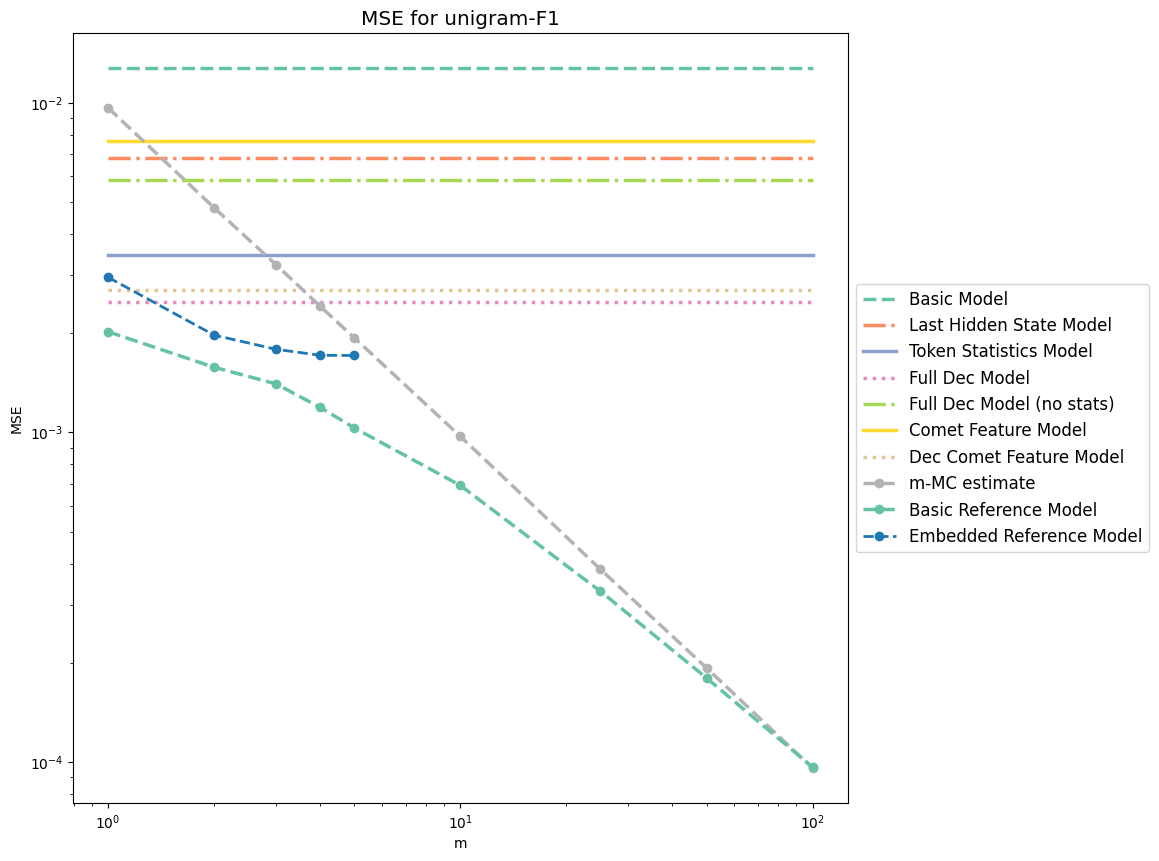

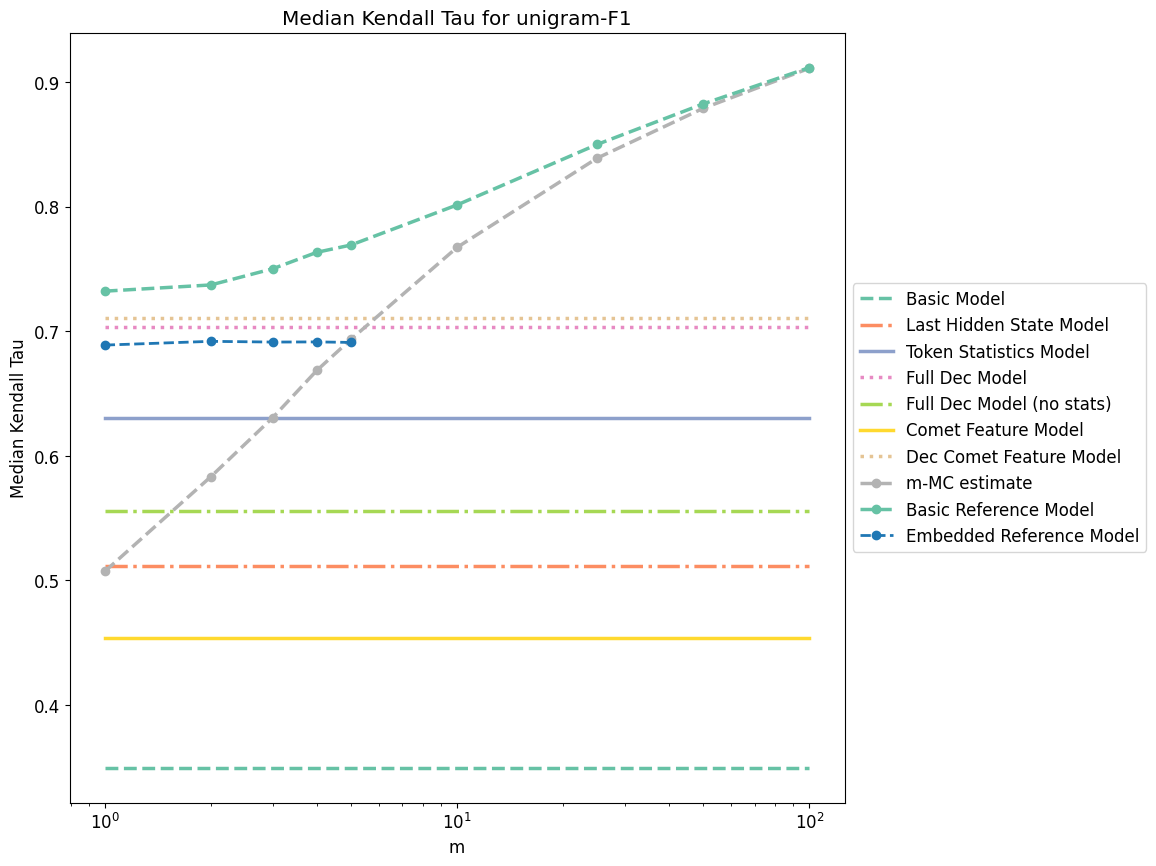

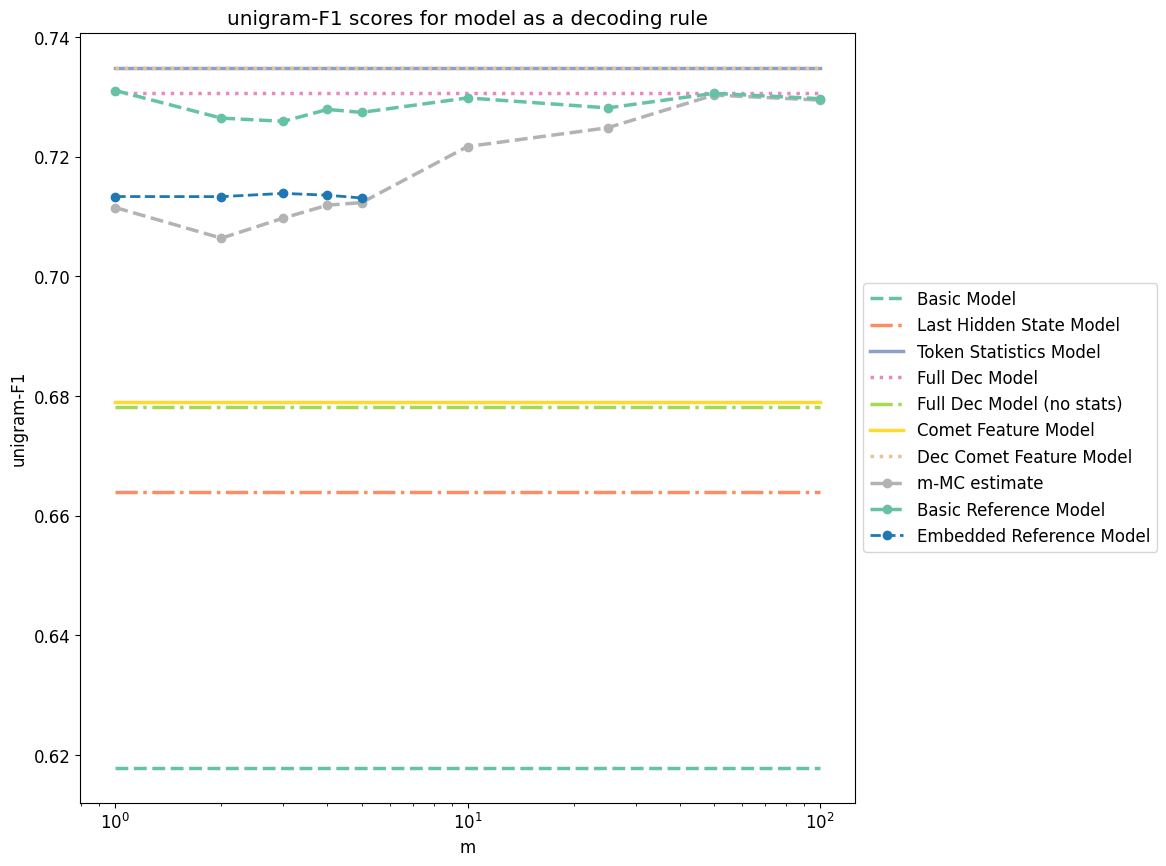

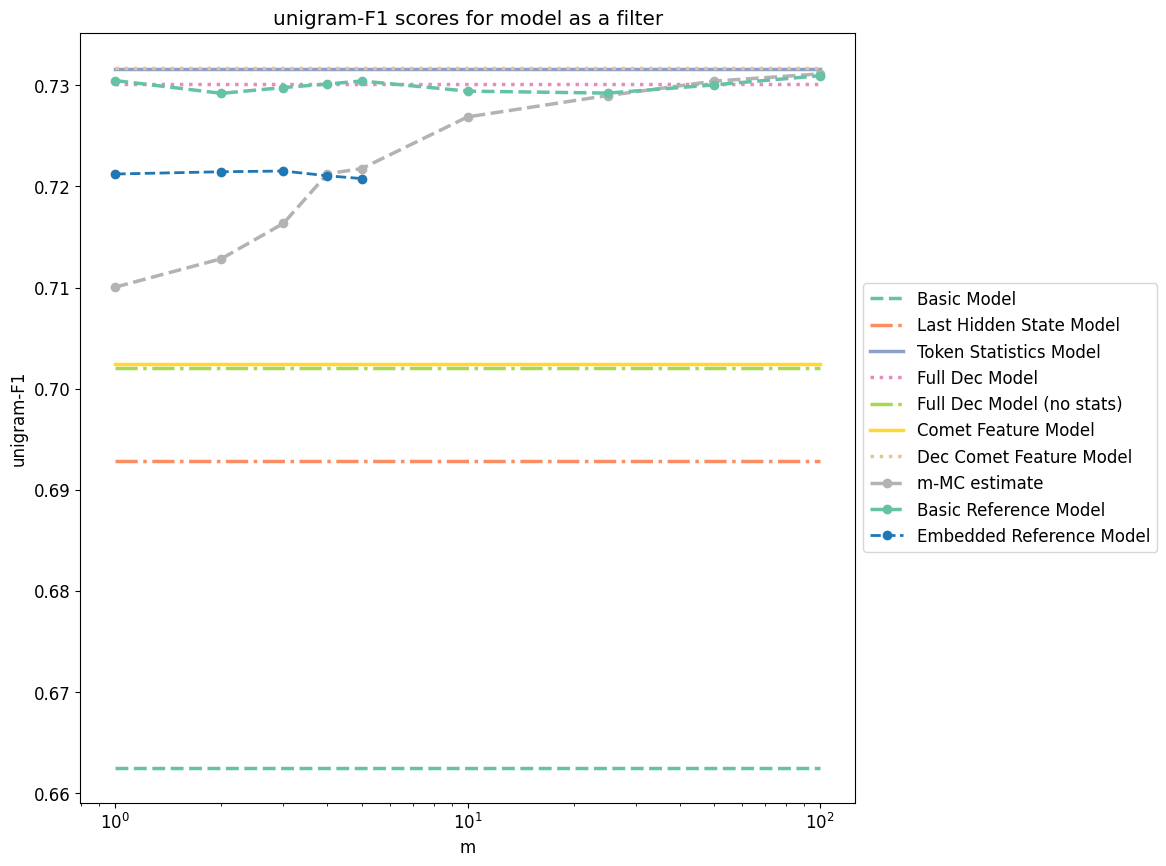

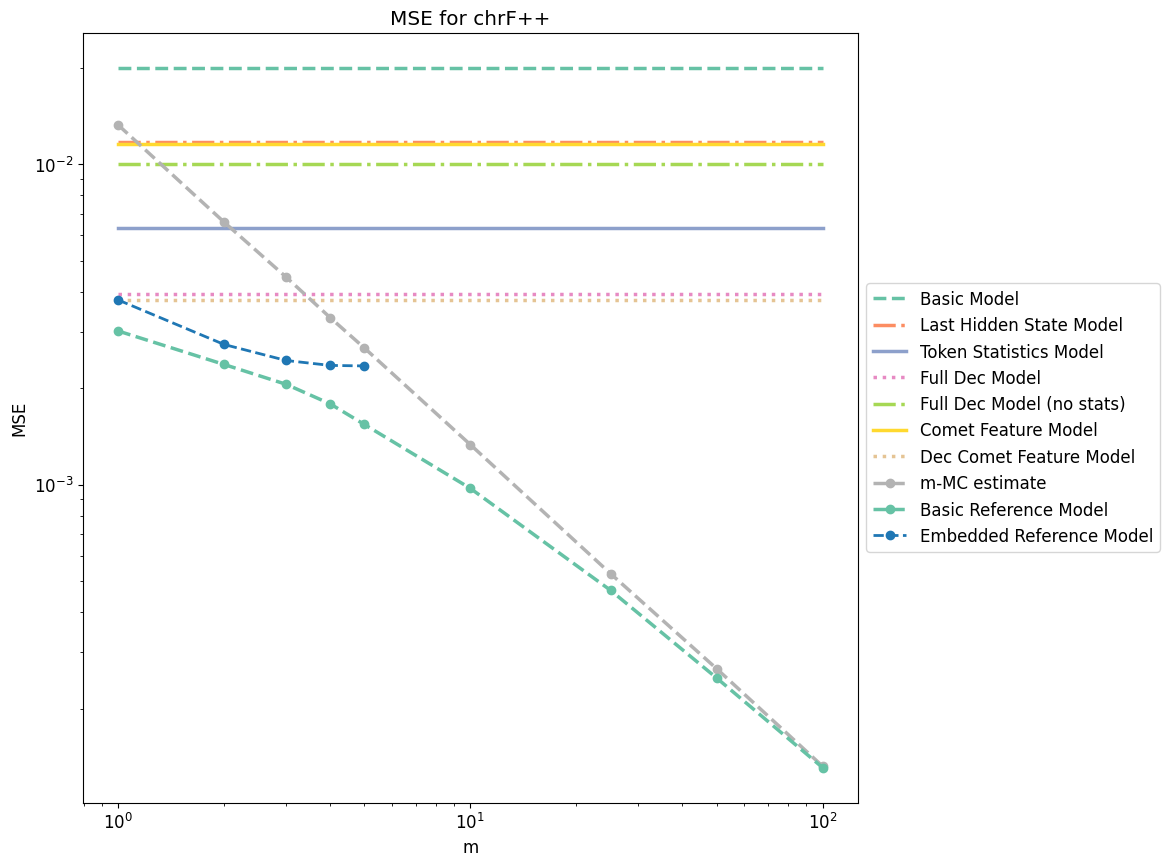

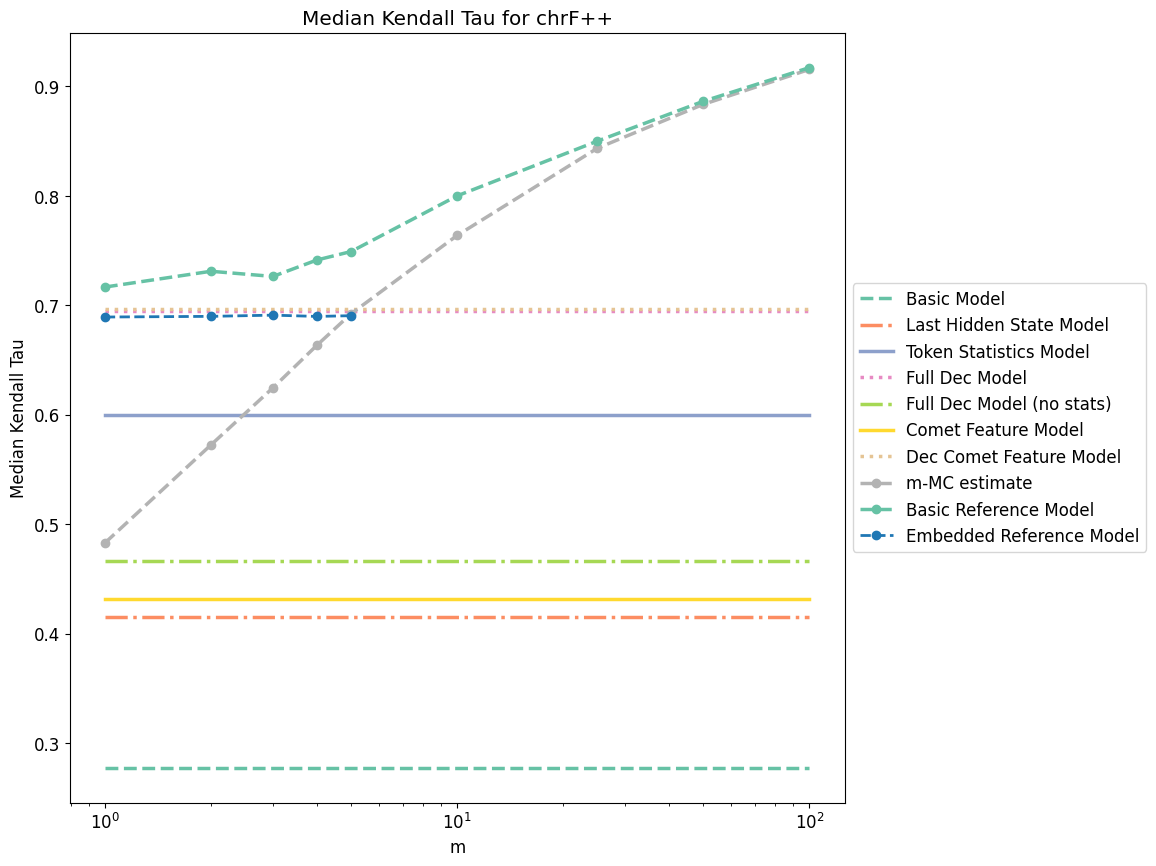

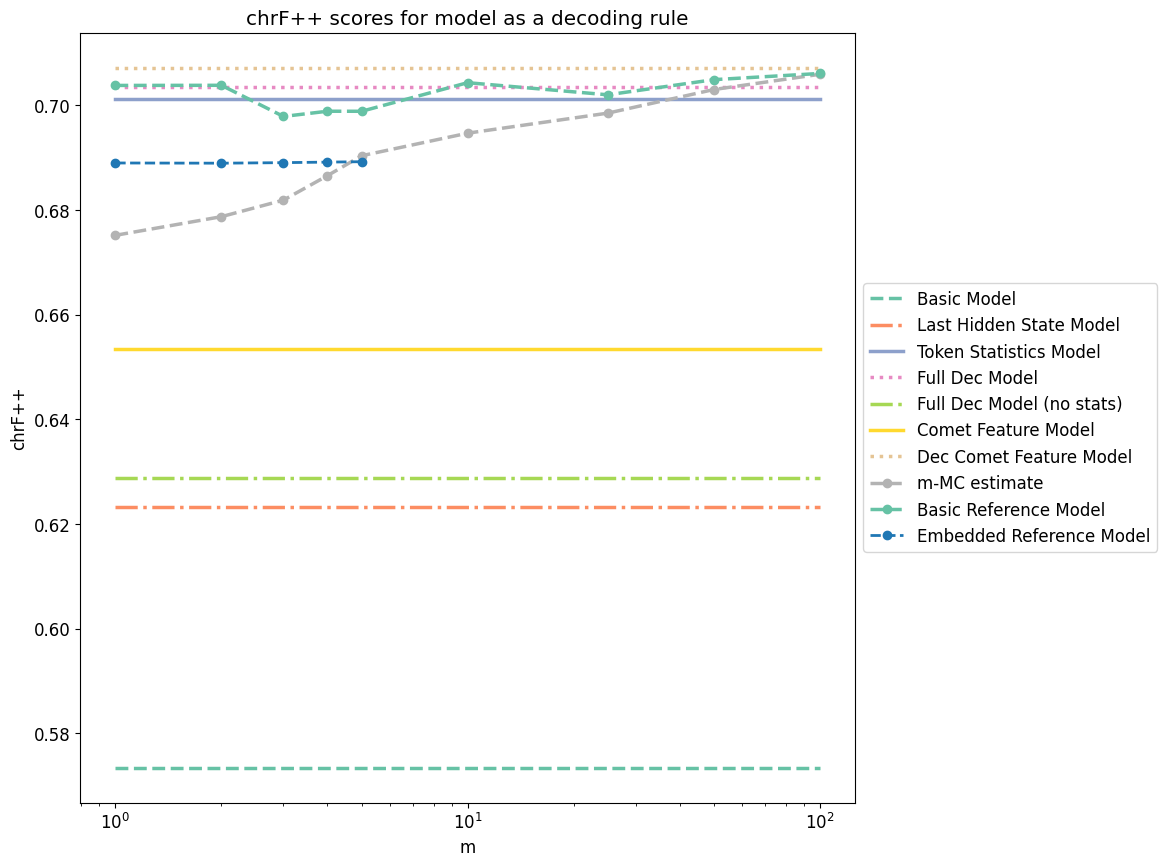

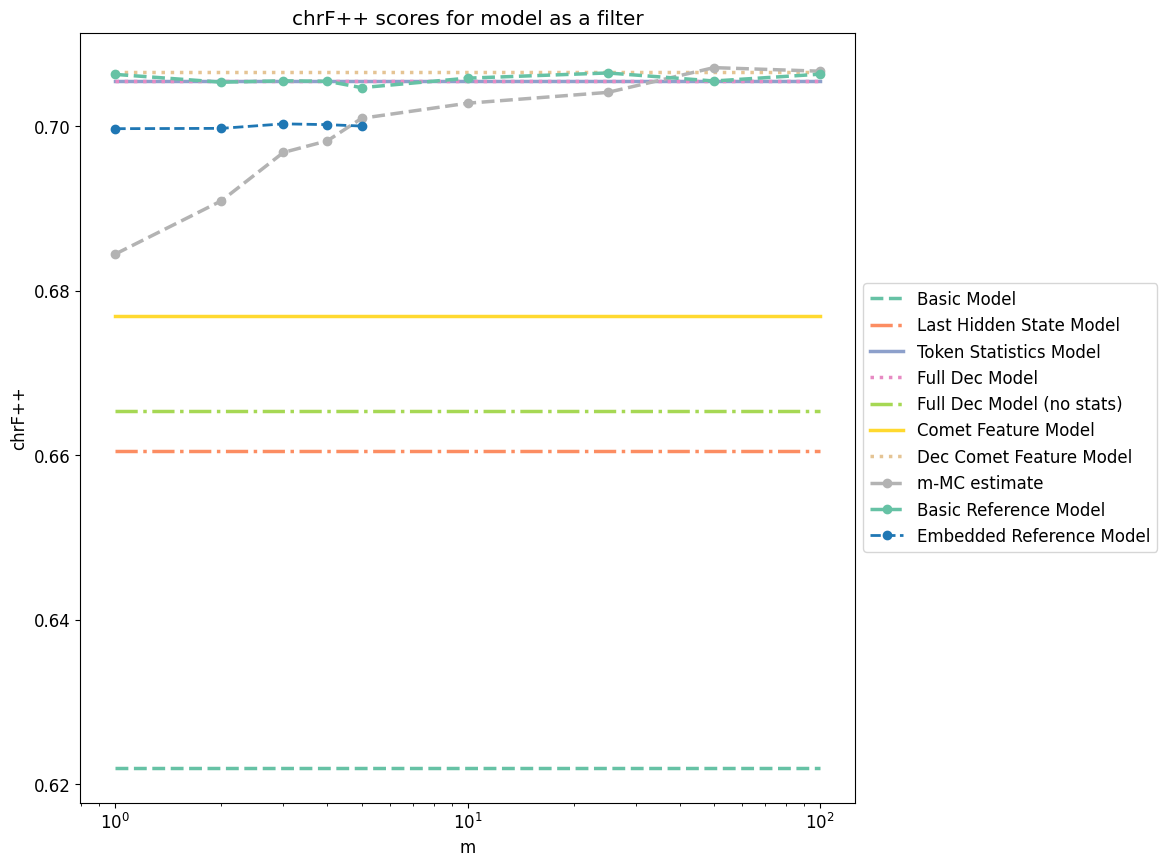

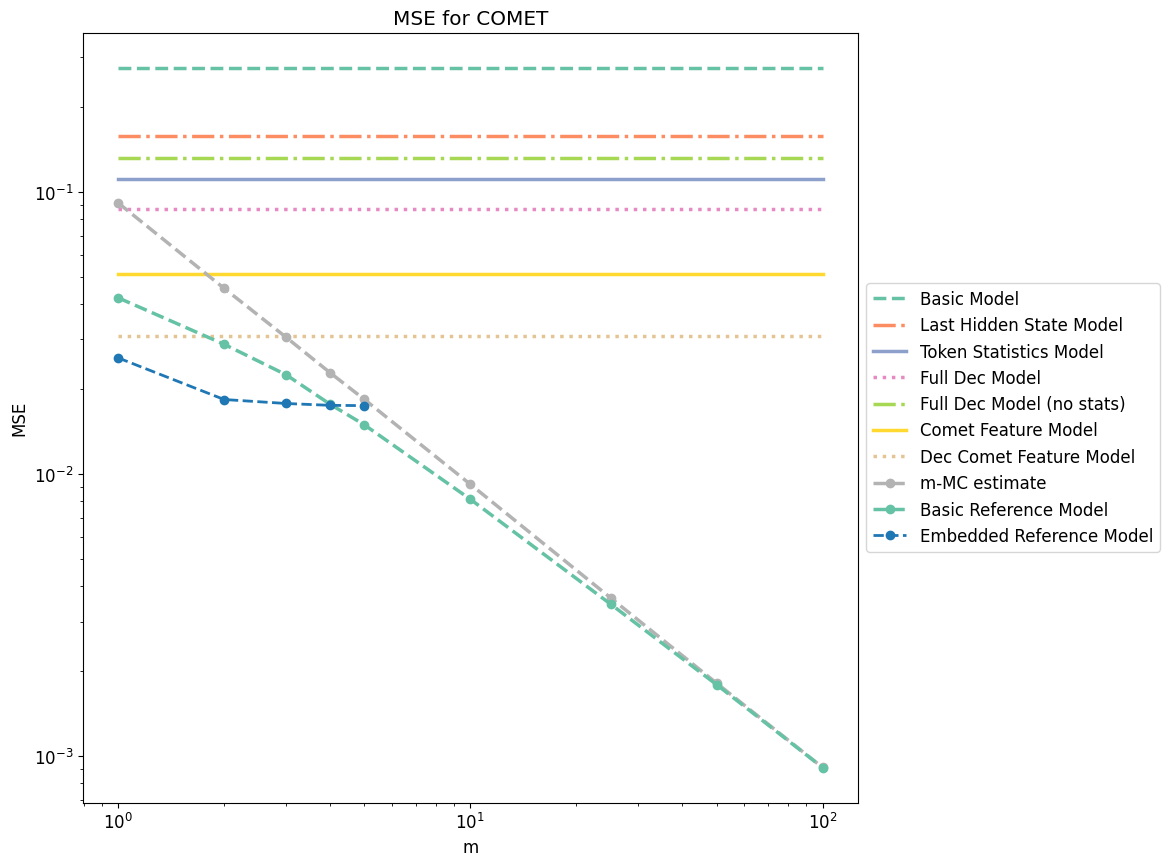

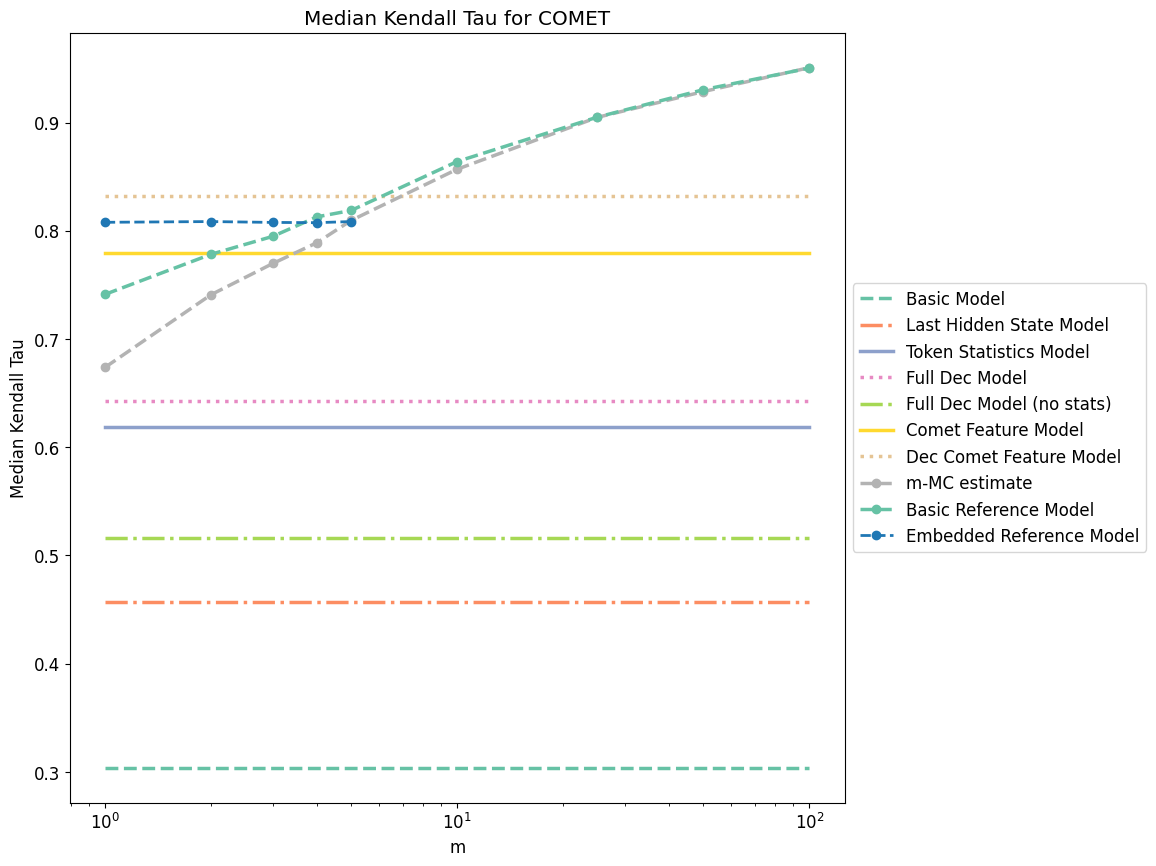

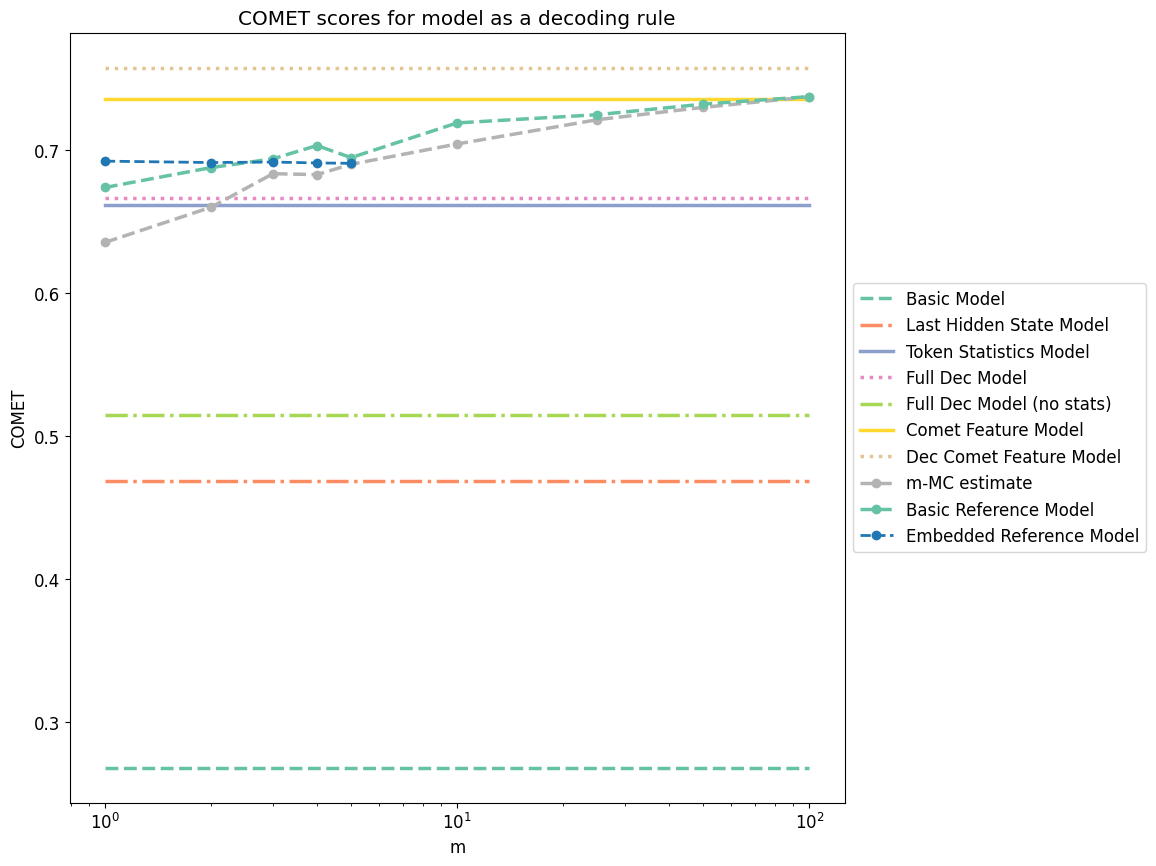

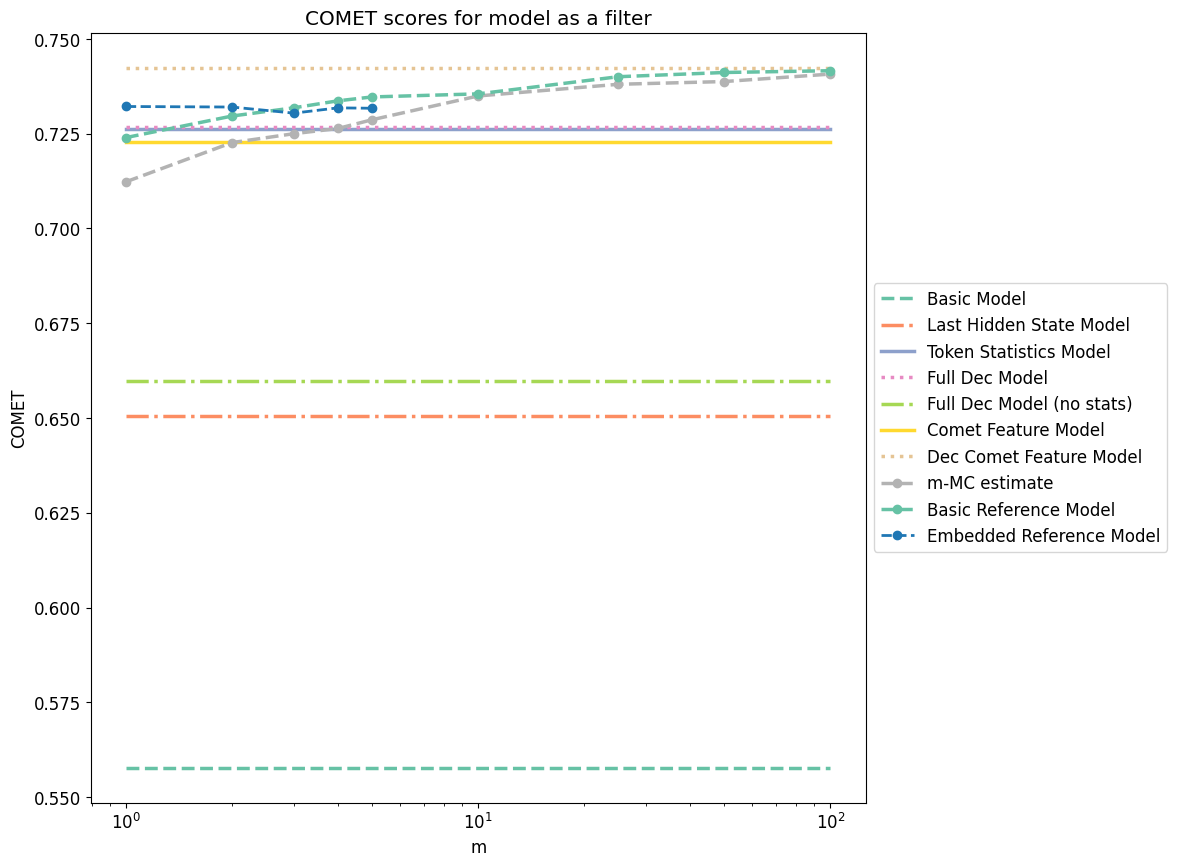

In [4]:
sns.color_palette('deep')

utilities = [
    ('unigram-f1', 'unigram-F1'),
    ('chrf', 'chrF++'),
    ('comet', 'COMET'),
]

statistics = [
    ('MSE', 'MSE', True),
    ('median_kendall_taus', 'Median Kendall Tau', False),

]

for util in utilities:
    for statistic in statistics:
        title = '{} for {}'.format(statistic[1], util[1])
        
        save_ref = '../results/{}/{}_{}.png'.format(util[0], util[0], statistic[0] )
        graph_results(models, util[0], statistic[0], title=title, statistic_name=statistic[1], y_log=statistic[2], save_ref=save_ref)
        
    save_ref = '../results/{}/{}_decoding.png'.format(util[0], util[0],  )
    title = '{} scores for model as a {}'.format(util[1], 'decoding rule')
    graph_results(models, util[0], 'best_{}_mean'.format(util[0].replace('-', '_')),  title=title, statistic_name=util[1],save_ref=save_ref)
    
    save_ref = '../results/{}/{}_filter.png'.format(util[0], util[0],  )
    title = '{} scores for model as a {}'.format(util[1], 'filter')
    graph_results(models, util[0], 'top_10_{}_mean'.format(util[0].replace('-', '_')),title=title, statistic_name=util[1],save_ref=save_ref)

#     save_ref = '../results/{}/{}_decoding_median.jpg'.format(util[0], util[0],  )
#     title = '{} scores for model as a {}'.format(util[1], 'decoding rule')
#     graph_results(models, util[0], 'best_{}_median'.format(util[0].replace('-', '_')),  title=title, statistic_name=util[1],save_ref=save_ref)
   

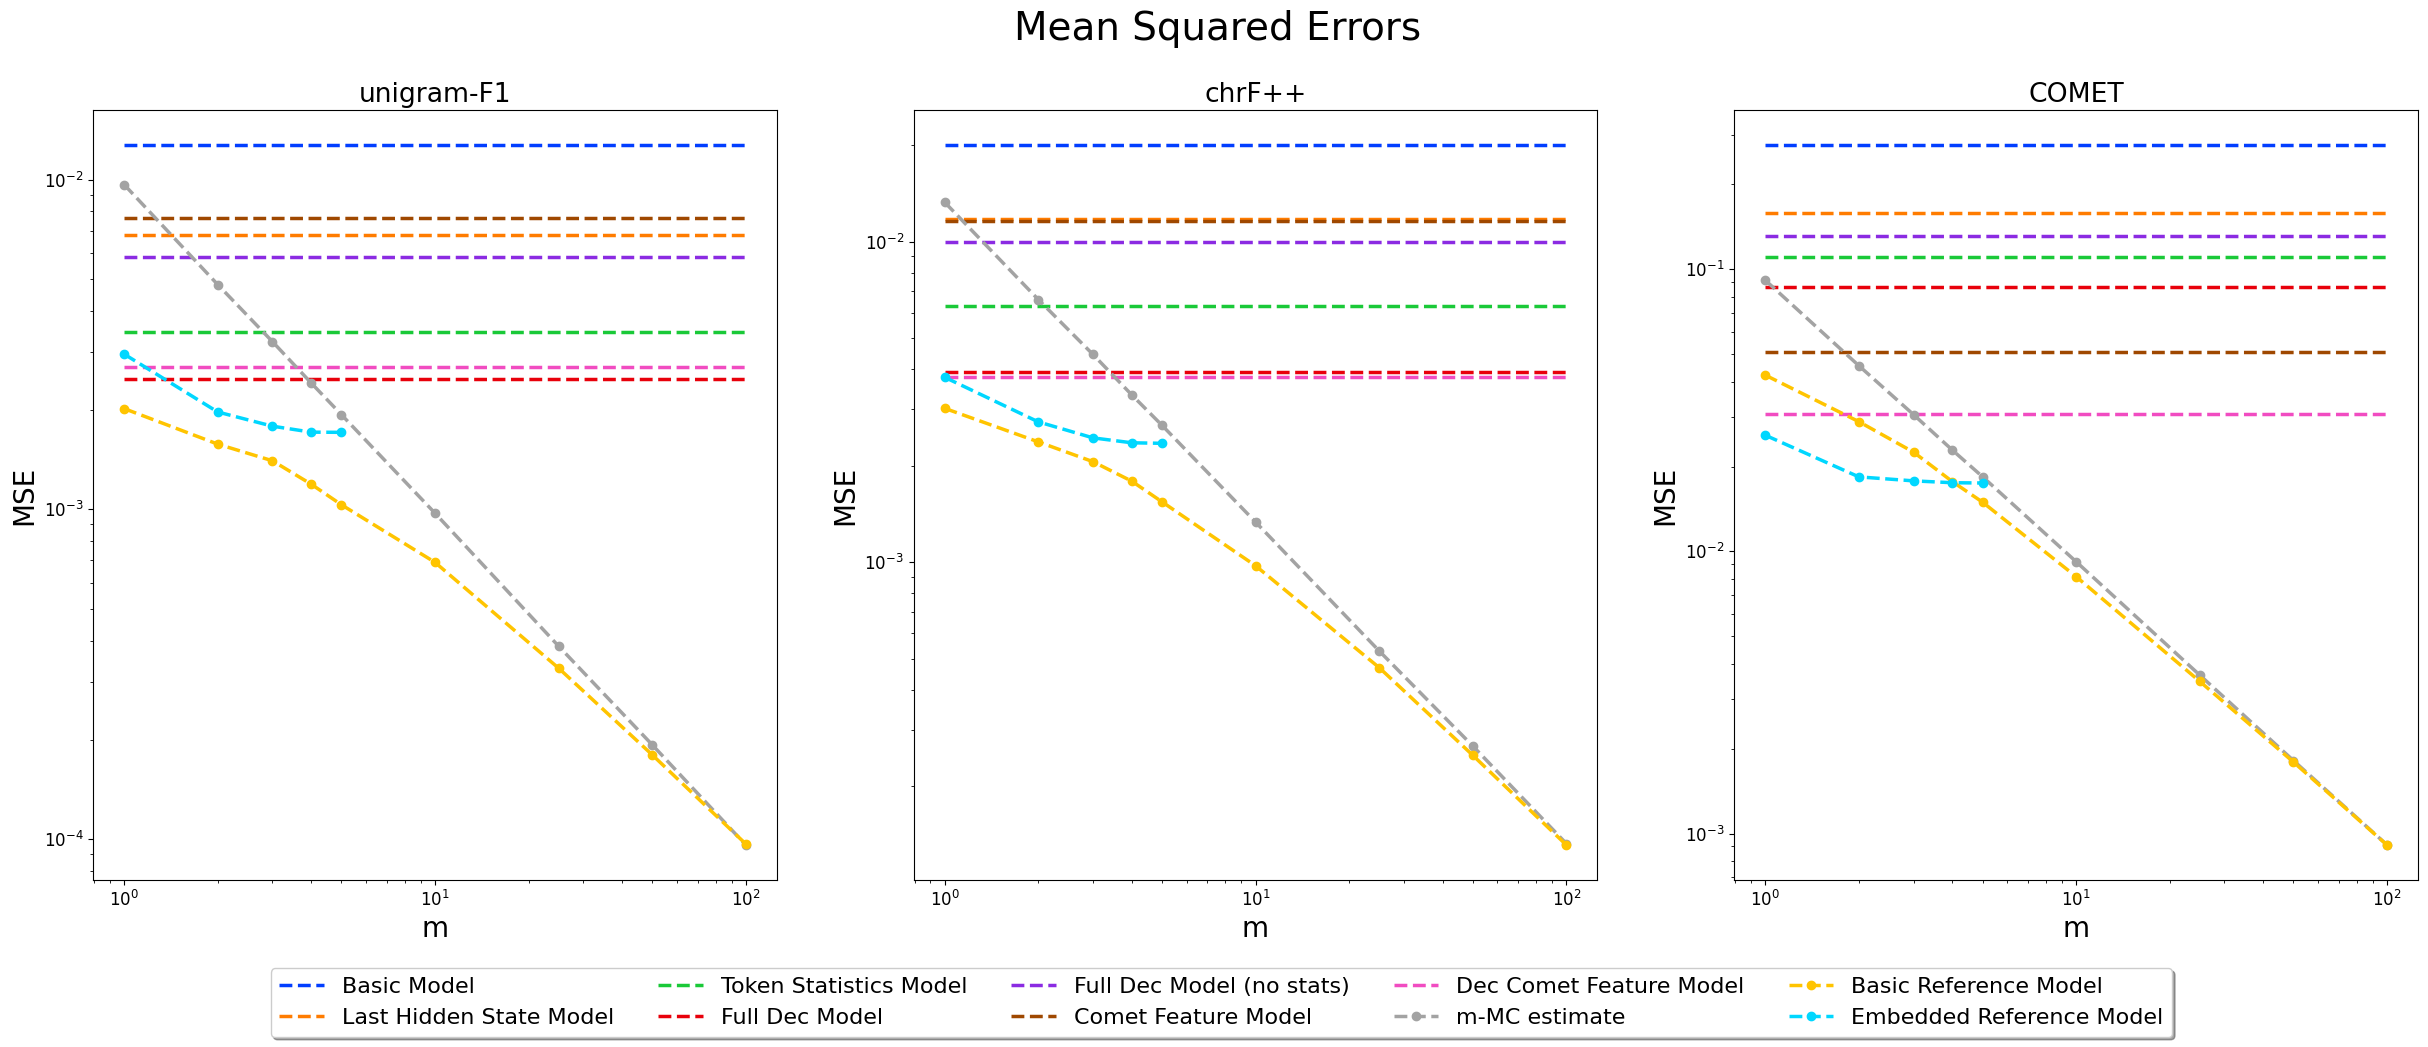

In [5]:
### Create a figure for MSE scores

# First we load a 


statistic = 'MSE'

fig, (axs) = plt.subplots(1, 3, figsize=(30,10))

for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.tick_params(axis='both', which='major', labelsize=16)
    #ax.tick_params(axis='both', which='minor', labelsize=16)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('MSE' ,  size=20)
    ax.set_title(utility[1])
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Mean Squared Errors', fontsize=28)
plt.show()


In [6]:

def create_table(columns):
    results = ""
    n_rows = len(columns[0])
    for row_index in range(n_rows):
        for column_index in range(len(columns)):
            if column_index != 0:
                results += " & {:.1e}".format(columns[column_index][row_index])
            else:
                results += str(columns[column_index][row_index])
        results += "\\\\ \n"
    print(results)


        

In [7]:
    

for statistic in ["MSE", "median_kendall_taus", ]:
    columns = []
    names = [PRETTY_NAMES[name] for name in models]
    columns.append(names)
    for util in utilities:

        result_models = load_results_models(models, utility=util[0])
        statistic_models = [r[statistic] for _, r in result_models.items()]
        print(statistic_models)
        columns.append(statistic_models)
    
    create_table(columns)


[0.01272496245331171, 0.006805854739107853, 0.0034560936021081103, 0.002482834965386608, 0.005831369777643615, 0.007667932692648993, 0.0026977361948144645]
[0.02005313972535903, 0.011753613672932345, 0.006321919621965297, 0.00392777714942081, 0.01001463790044613, 0.011593159193296556, 0.003779672223666309]
[0.2758548261173859, 0.15777425656162547, 0.11070619639202514, 0.08668754278375597, 0.13151200058291737, 0.05109517033385365, 0.030742968211666465]
Basic Model & 1.3e-02 & 2.0e-02 & 2.8e-01\\ 
Last Hidden State Model & 6.8e-03 & 1.2e-02 & 1.6e-01\\ 
Token Statistics Model & 3.5e-03 & 6.3e-03 & 1.1e-01\\ 
Full Dec Model & 2.5e-03 & 3.9e-03 & 8.7e-02\\ 
Full Dec Model (no stats) & 5.8e-03 & 1.0e-02 & 1.3e-01\\ 
Comet Feature Model & 7.7e-03 & 1.2e-02 & 5.1e-02\\ 
Dec Comet Feature Model & 2.7e-03 & 3.8e-03 & 3.1e-02\\ 

[0.34968020237044006, 0.511478158987012, 0.6301426827602978, 0.7034888476805607, 0.5555555555555556, 0.45362821239077833, 0.7103448275862069]
[0.2775757575757576, 0.415

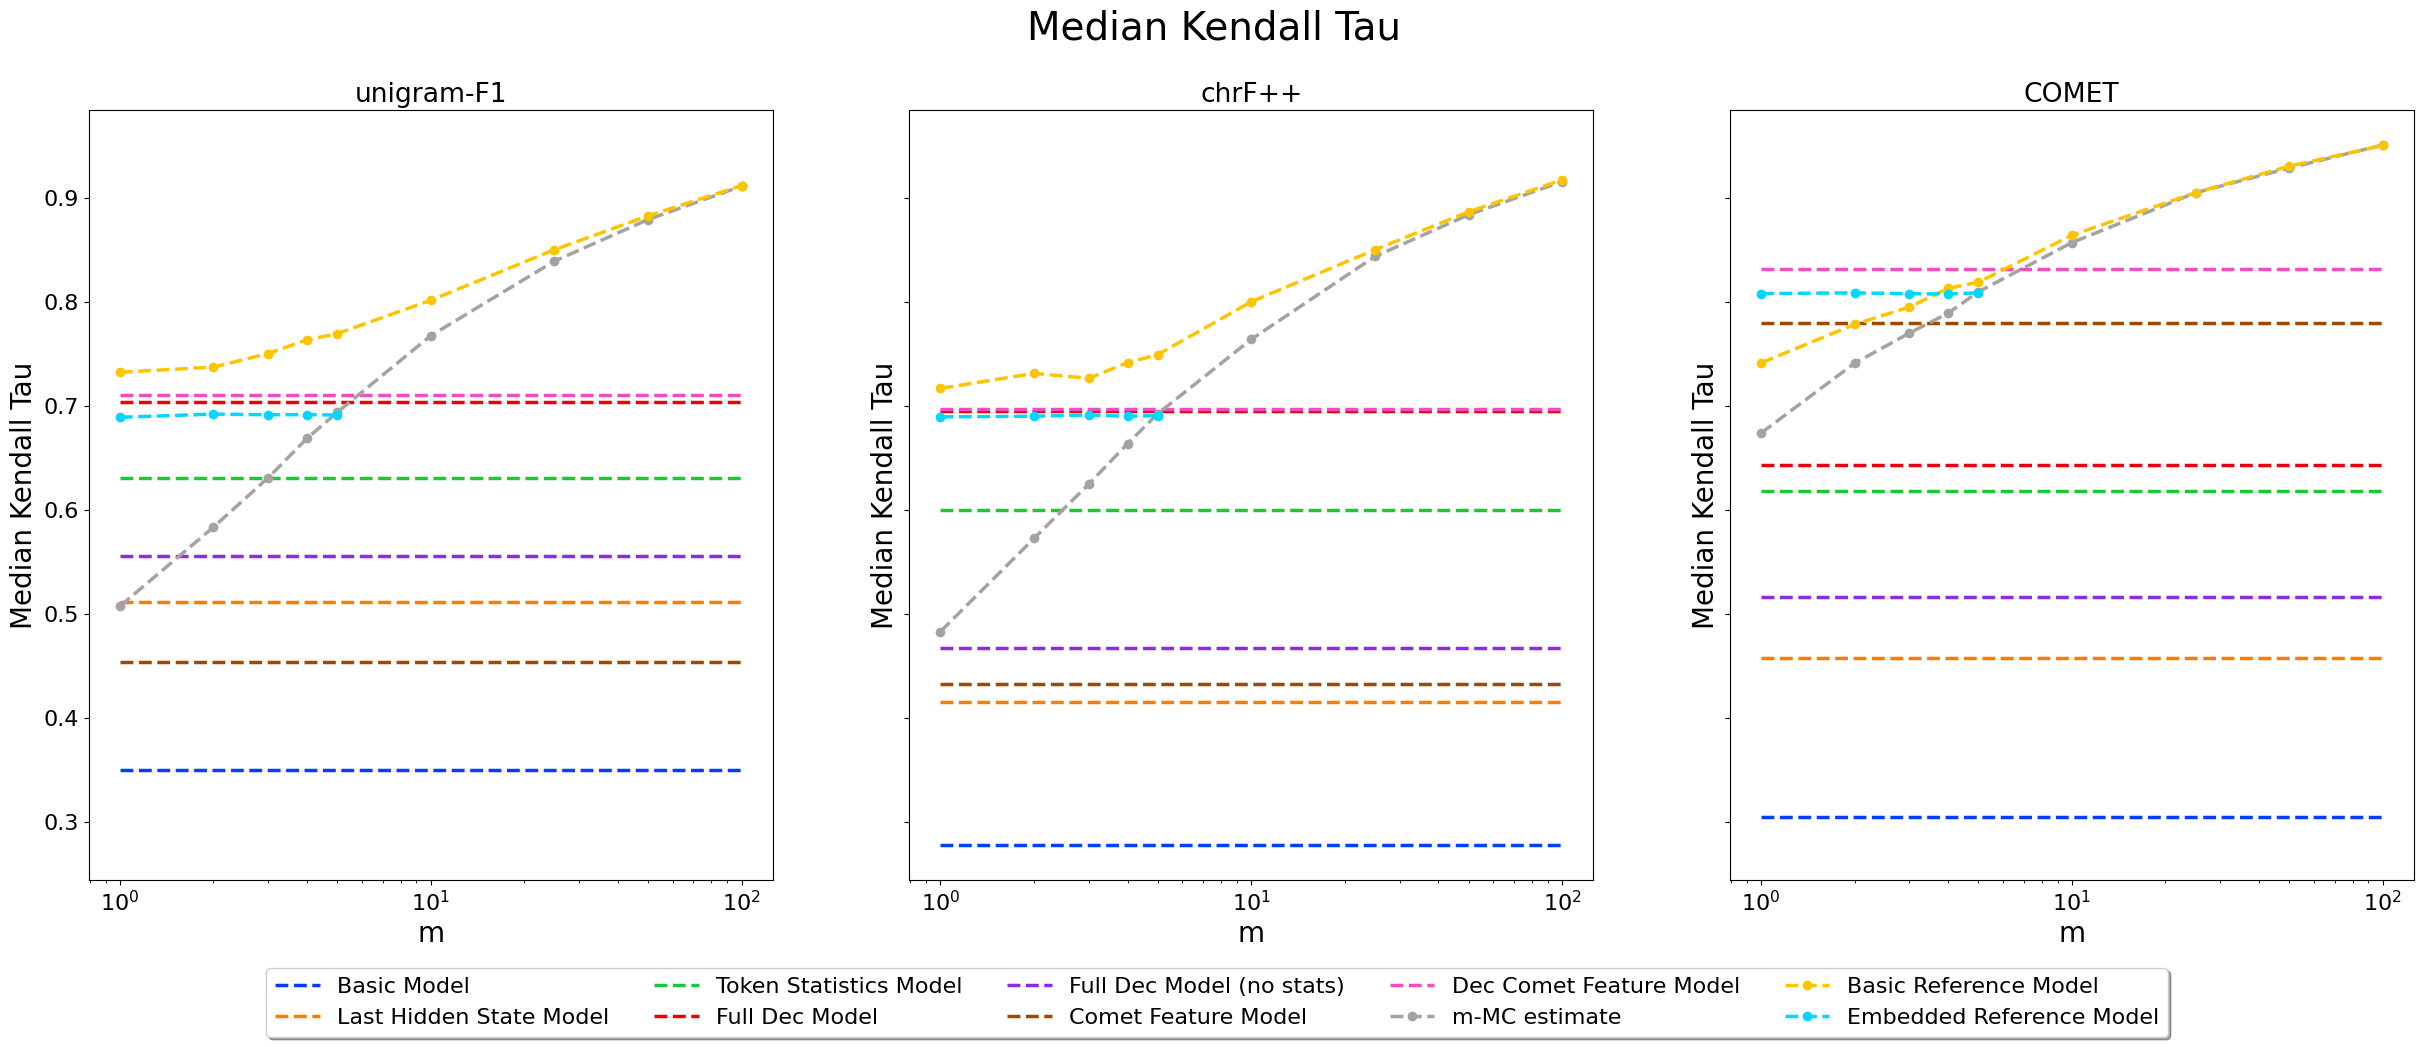

In [8]:
### Create a figure for MSE scores

# First we load a 


statistic = 'median_kendall_taus'

fig, (axs) = plt.subplots(1, 3, figsize=(30,10), sharey=True)

for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('Median Kendall Tau' ,  size=20)
    ax.set_title(utility[1])
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Median Kendall Tau', fontsize=28)
plt.show()


[0.2682091123216417, 0.4685621606189815, 0.6616556263248081, 0.6663777939782339, 0.5148198817172681, 0.7357877940945721, 0.7574678063351028]
[0.18298917385935784, 0.3624283326894045, 0.5716563709646464, 0.5716080582588912, 0.403622171702981, 0.5629429412007332, 0.6005109945088625]


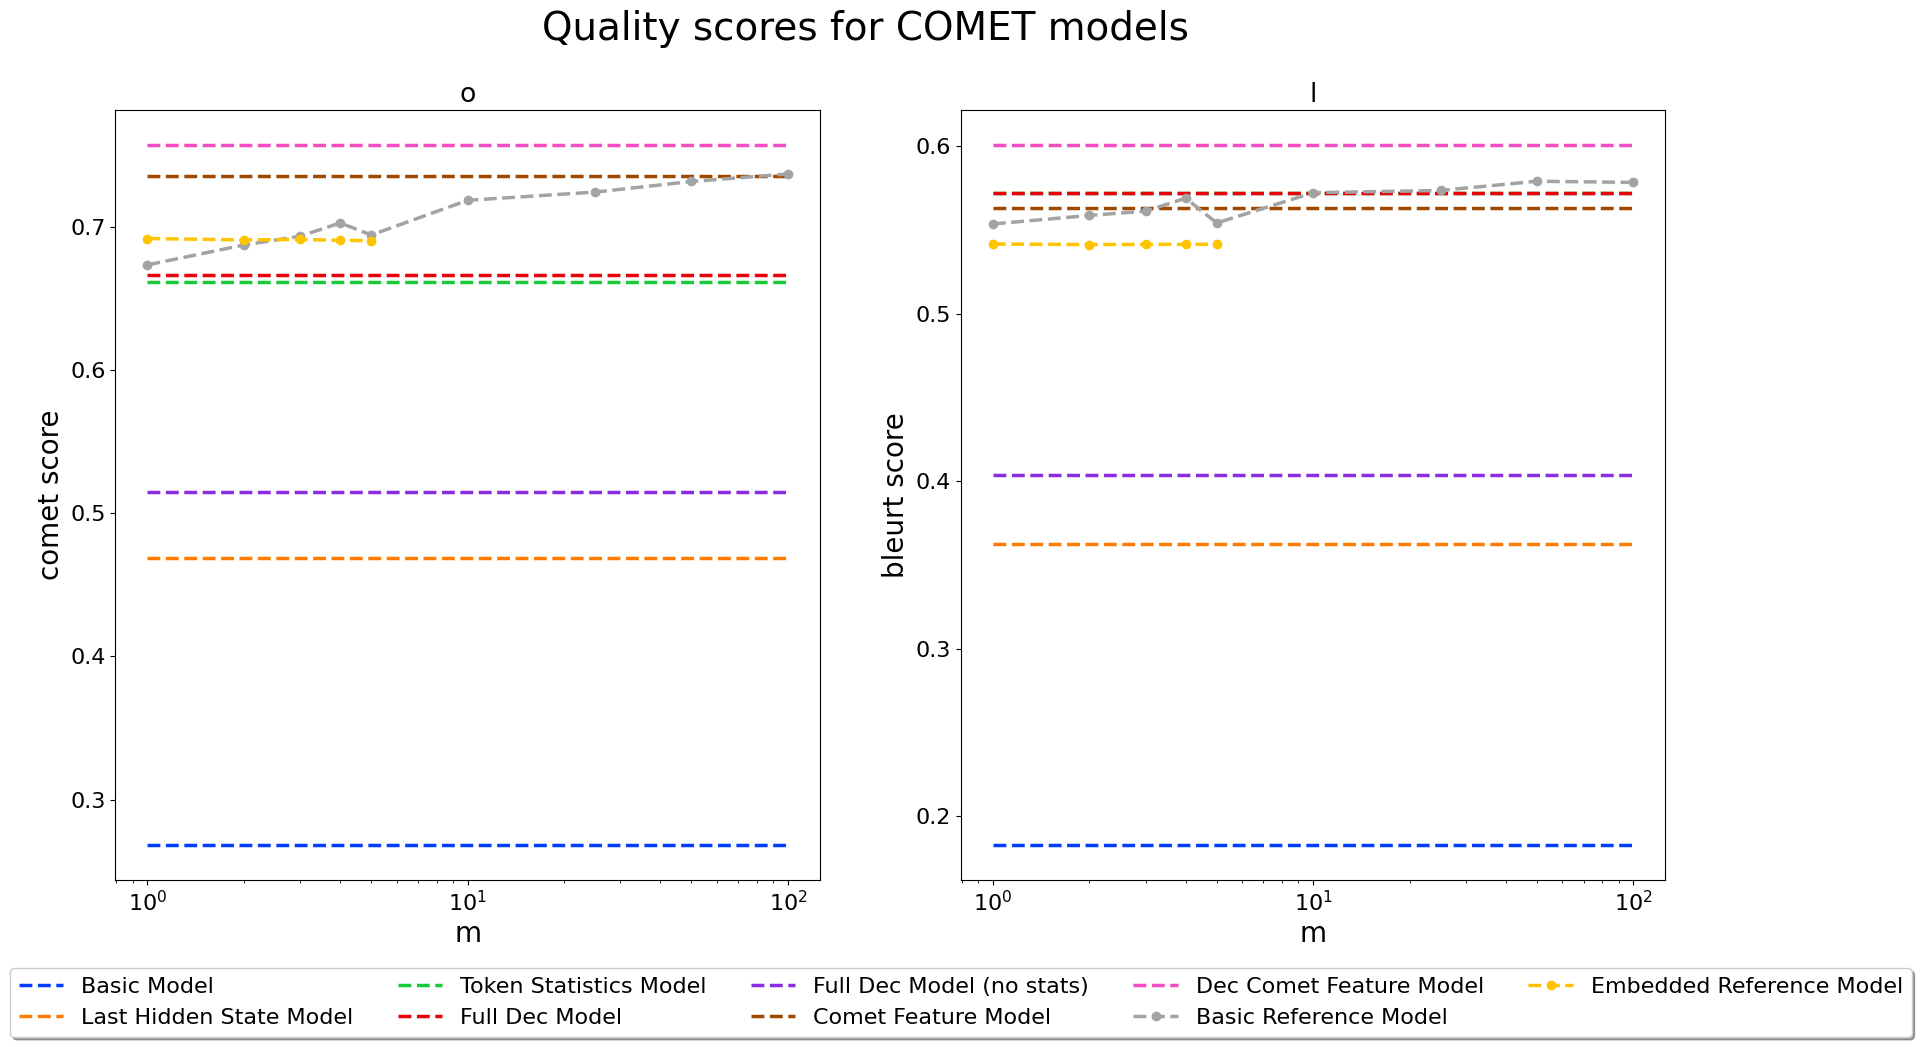

In [9]:
### Create a figure for utilities


util_of_interest = 'comet'


fig, (axs) = plt.subplots(1, 2, figsize=(20,10))


for i, utility in enumerate([util_of_interest, 'bleurt']):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'best_{}_mean'.format(utility)
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=util_of_interest)
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
#     results_m_mc_estimate = load_result_m_mc_estimate(utility=util_of_interest)
#     statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=util_of_interest)
    print(statistic_models)
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=util_of_interest)
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('{} score'.format(utility),  size=20)
    ax.set_title(utility[1])
    
    #ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.0, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Quality scores for COMET models', fontsize=28)
plt.show()

[0.5734319689097916, 0.6231636693284658, 0.7012423131473801, 0.7035465005626352, 0.6288204356634863, 0.6534137726226409, 0.7072041098877319]
[0.08031846489608288, 0.31855605307519436, 0.5226708894491195, 0.5204472150087357, 0.34191562053263186, 0.5119246999979019, 0.544979652017355]


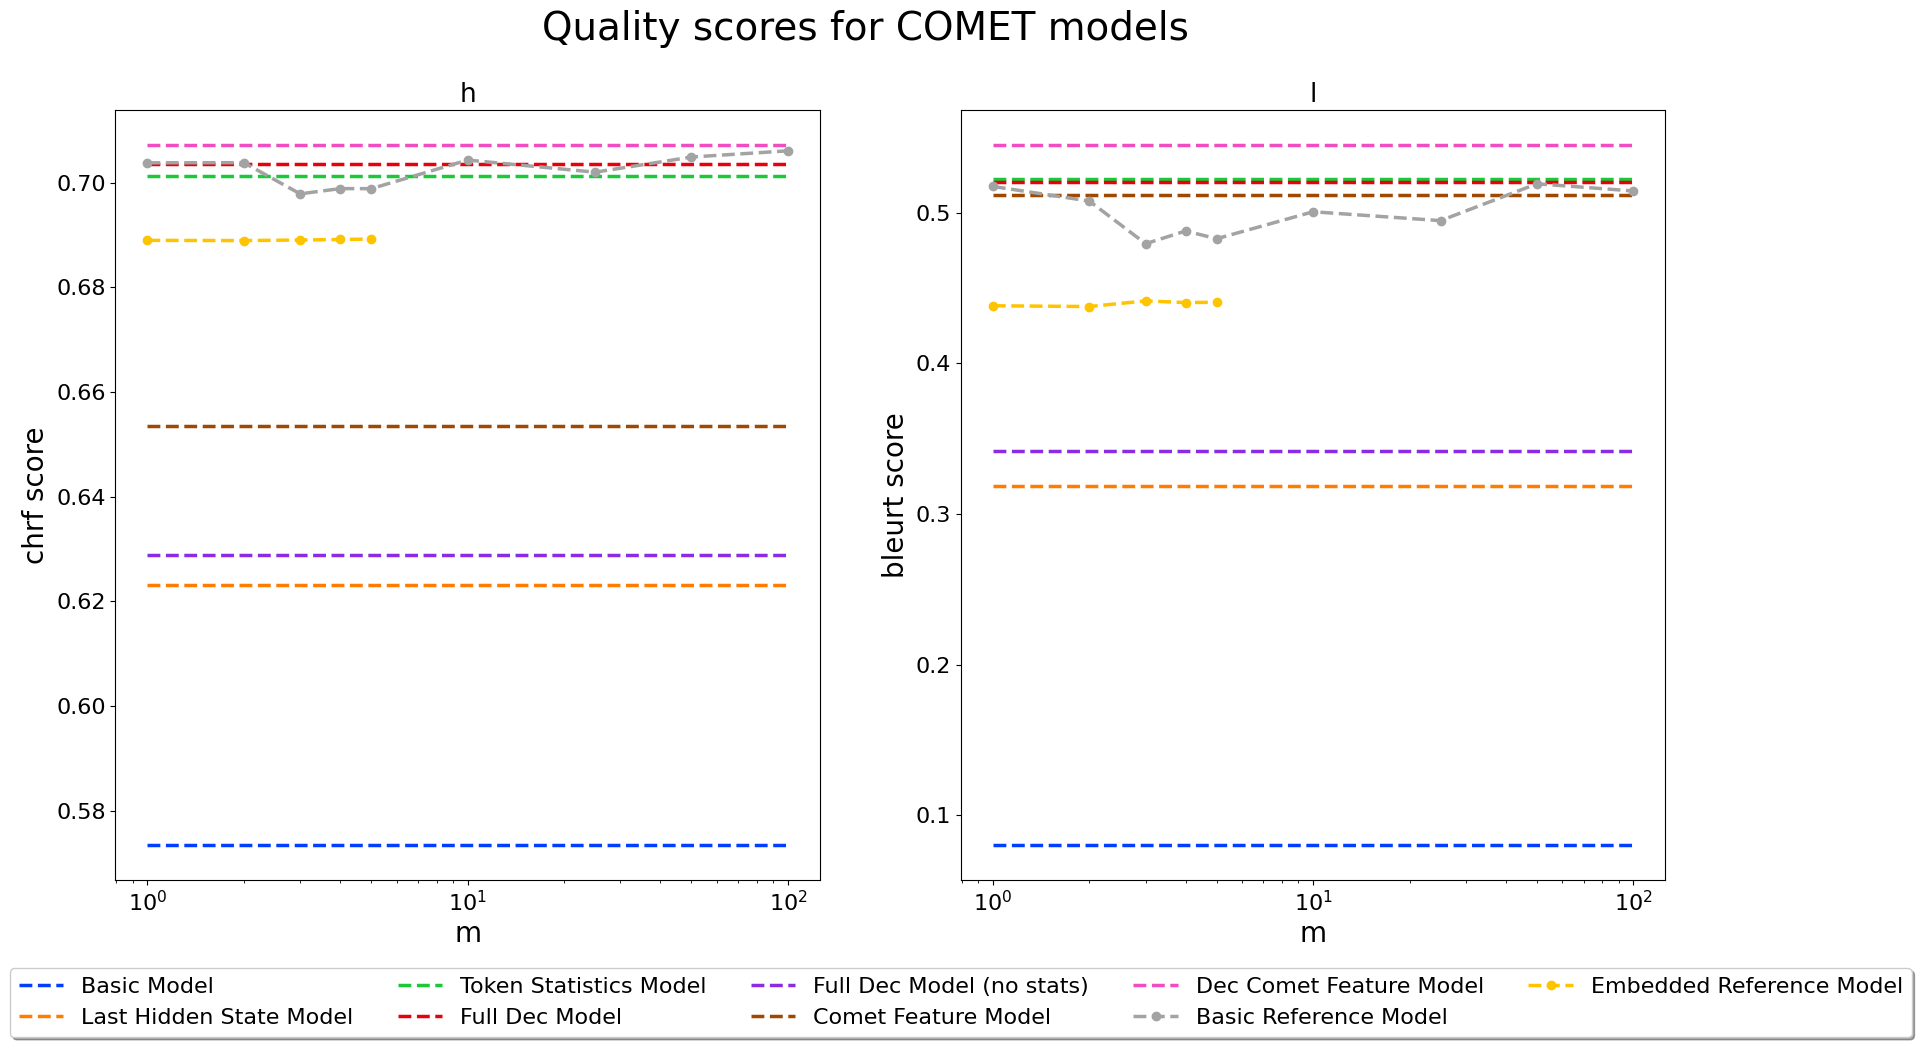

In [10]:
### Create a figure for utilities


util_of_interest = 'chrf'


fig, (axs) = plt.subplots(1, 2, figsize=(20,10))


for i, utility in enumerate([util_of_interest, 'bleurt']):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'best_{}_mean'.format(utility)
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=util_of_interest)
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
#     results_m_mc_estimate = load_result_m_mc_estimate(utility=util_of_interest)
#     statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=util_of_interest)
    print(statistic_models)
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=util_of_interest)
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('{} score'.format(utility),  size=20)
    ax.set_title(utility[1])
    
    #ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.0, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Quality scores for COMET models', fontsize=28)
plt.show()

[0.6179111874546799, 0.6639037266304467, 0.7348661619961625, 0.7306364072291522, 0.6781117196002089, 0.679052122817429, 0.7348395811607358]
[0.1329161813288927, 0.3411247897326946, 0.53450885668993, 0.5115096120804549, 0.3530418268233538, 0.5054309003323316, 0.5308709695488214]


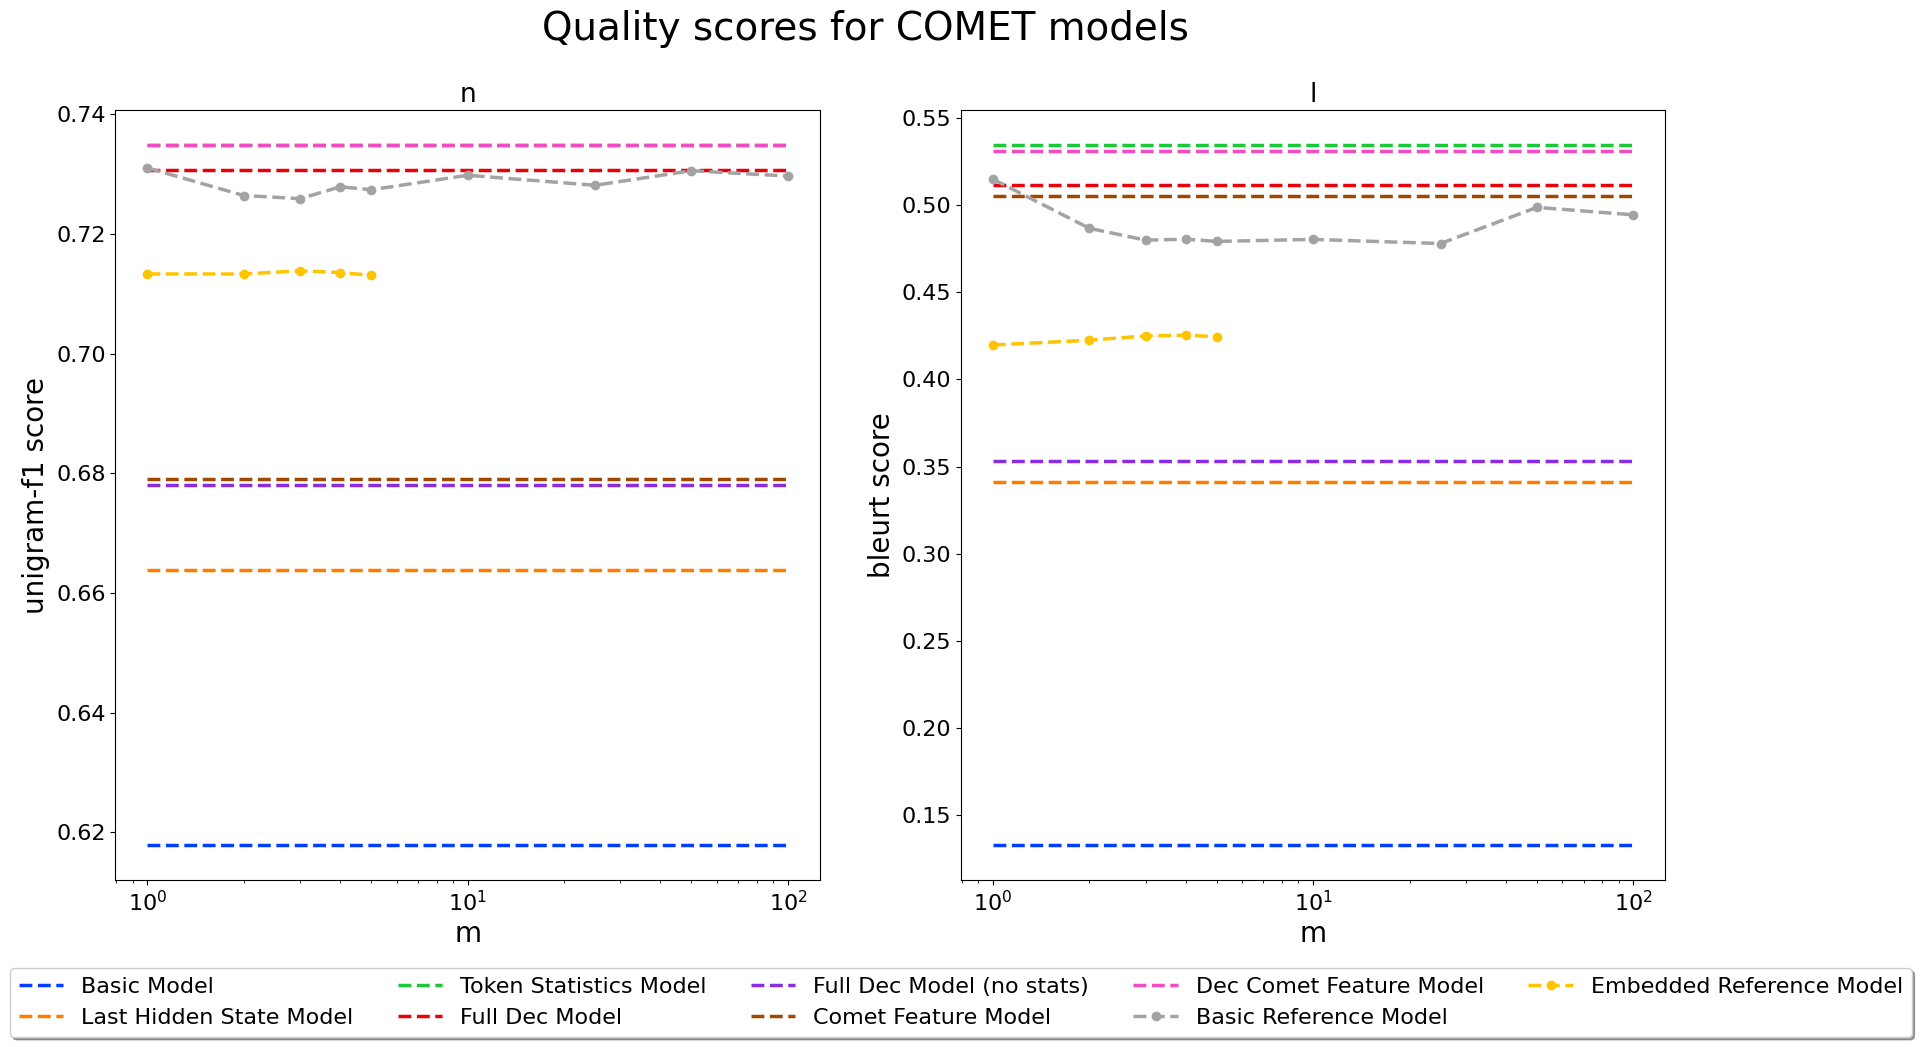

In [11]:
### Create a figure for utilities


util_of_interest = 'unigram-f1'


fig, (axs) = plt.subplots(1, 2, figsize=(20,10))


for i, utility in enumerate([util_of_interest, 'bleurt']):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'best_{}_mean'.format(utility.replace('-', '_'))
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=util_of_interest)
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
#     results_m_mc_estimate = load_result_m_mc_estimate(utility=util_of_interest)
#     statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=util_of_interest)
    print(statistic_models)
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=util_of_interest)
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('{} score'.format(utility),  size=20)
    ax.set_title(utility[1])
    
    #ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.0, -.1), fancybox=True, shadow=True, ncol=5)
fig.suptitle('Quality scores for COMET models', fontsize=28)
plt.show()

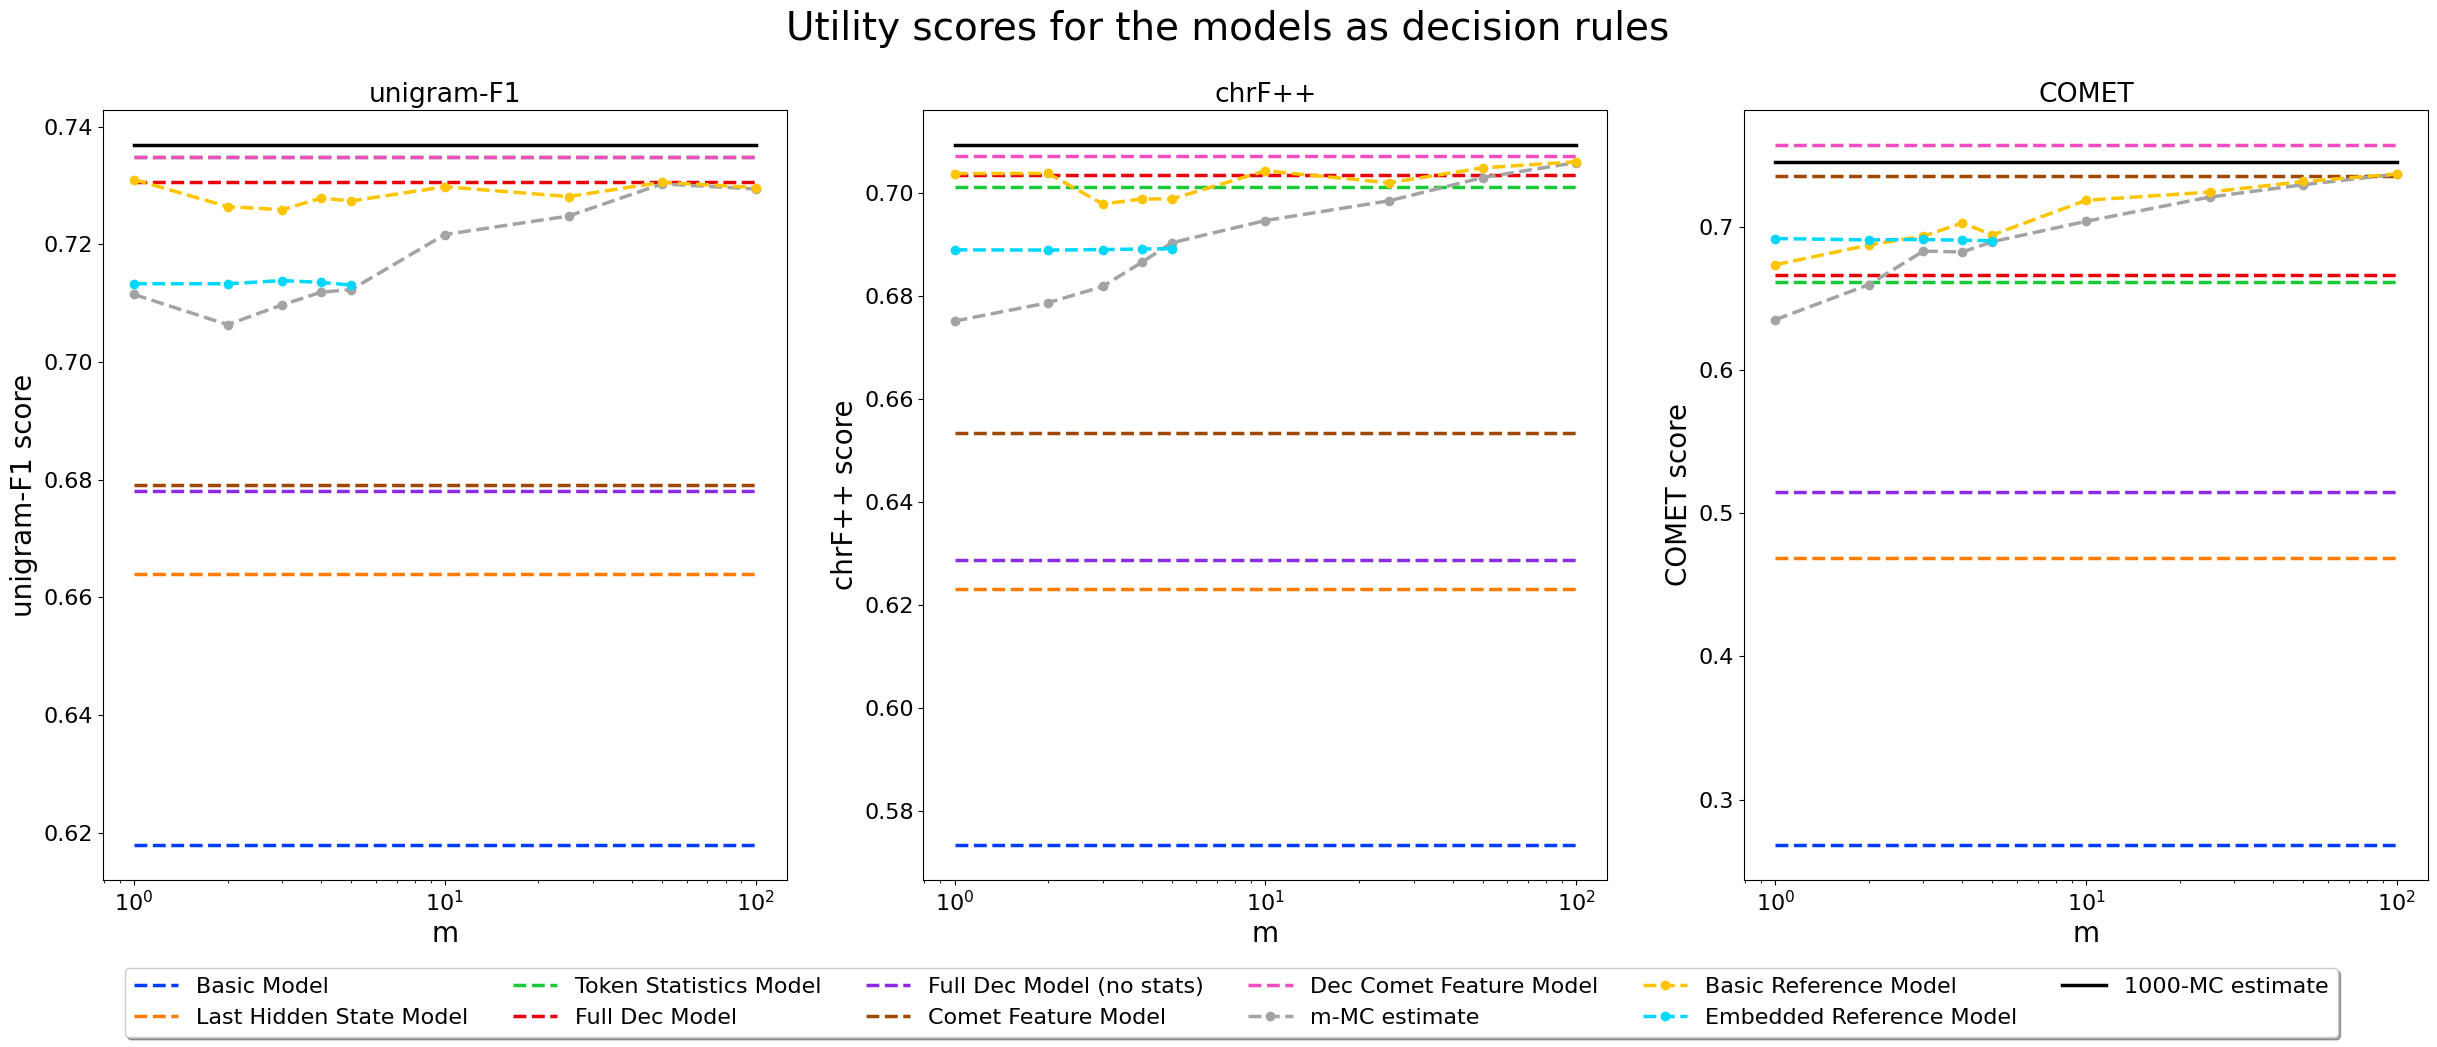

In [12]:
### Create a figure for utilities




utilities = [
    ('unigram-f1', 'unigram-F1'),
    ('chrf', 'chrF++'),
    ('comet', 'COMET'),
]

fig, (axs) = plt.subplots(1, 3, figsize=(30,10))

beam_search_results = get_beam_search_results()

for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'best_{}_mean'.format(utility[0].replace('-', '_'))
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    results_1000_mc_estimate = get_result_1000_mc_estimate(utility=utility[0])

    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')


       
#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('{} score'.format(utility[1]),  size=20)
    ax.set_title(utility[1])
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
    #ax.plot(ms, [beam_search_results["{}_mean".format(utility[0].replace('-', '_'))]] * 9, '-', label='beam search', color = 'black', lw=lw)
    
    ax.plot(ms, [results_1000_mc_estimate["{}_mean".format(utility[0].replace('-', '_'))]] * 9, '-', label='1000-MC estimate', color = 'black', lw=lw)
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=6)
fig.suptitle('Utility scores for the models as decision rules', fontsize=28)
plt.show()

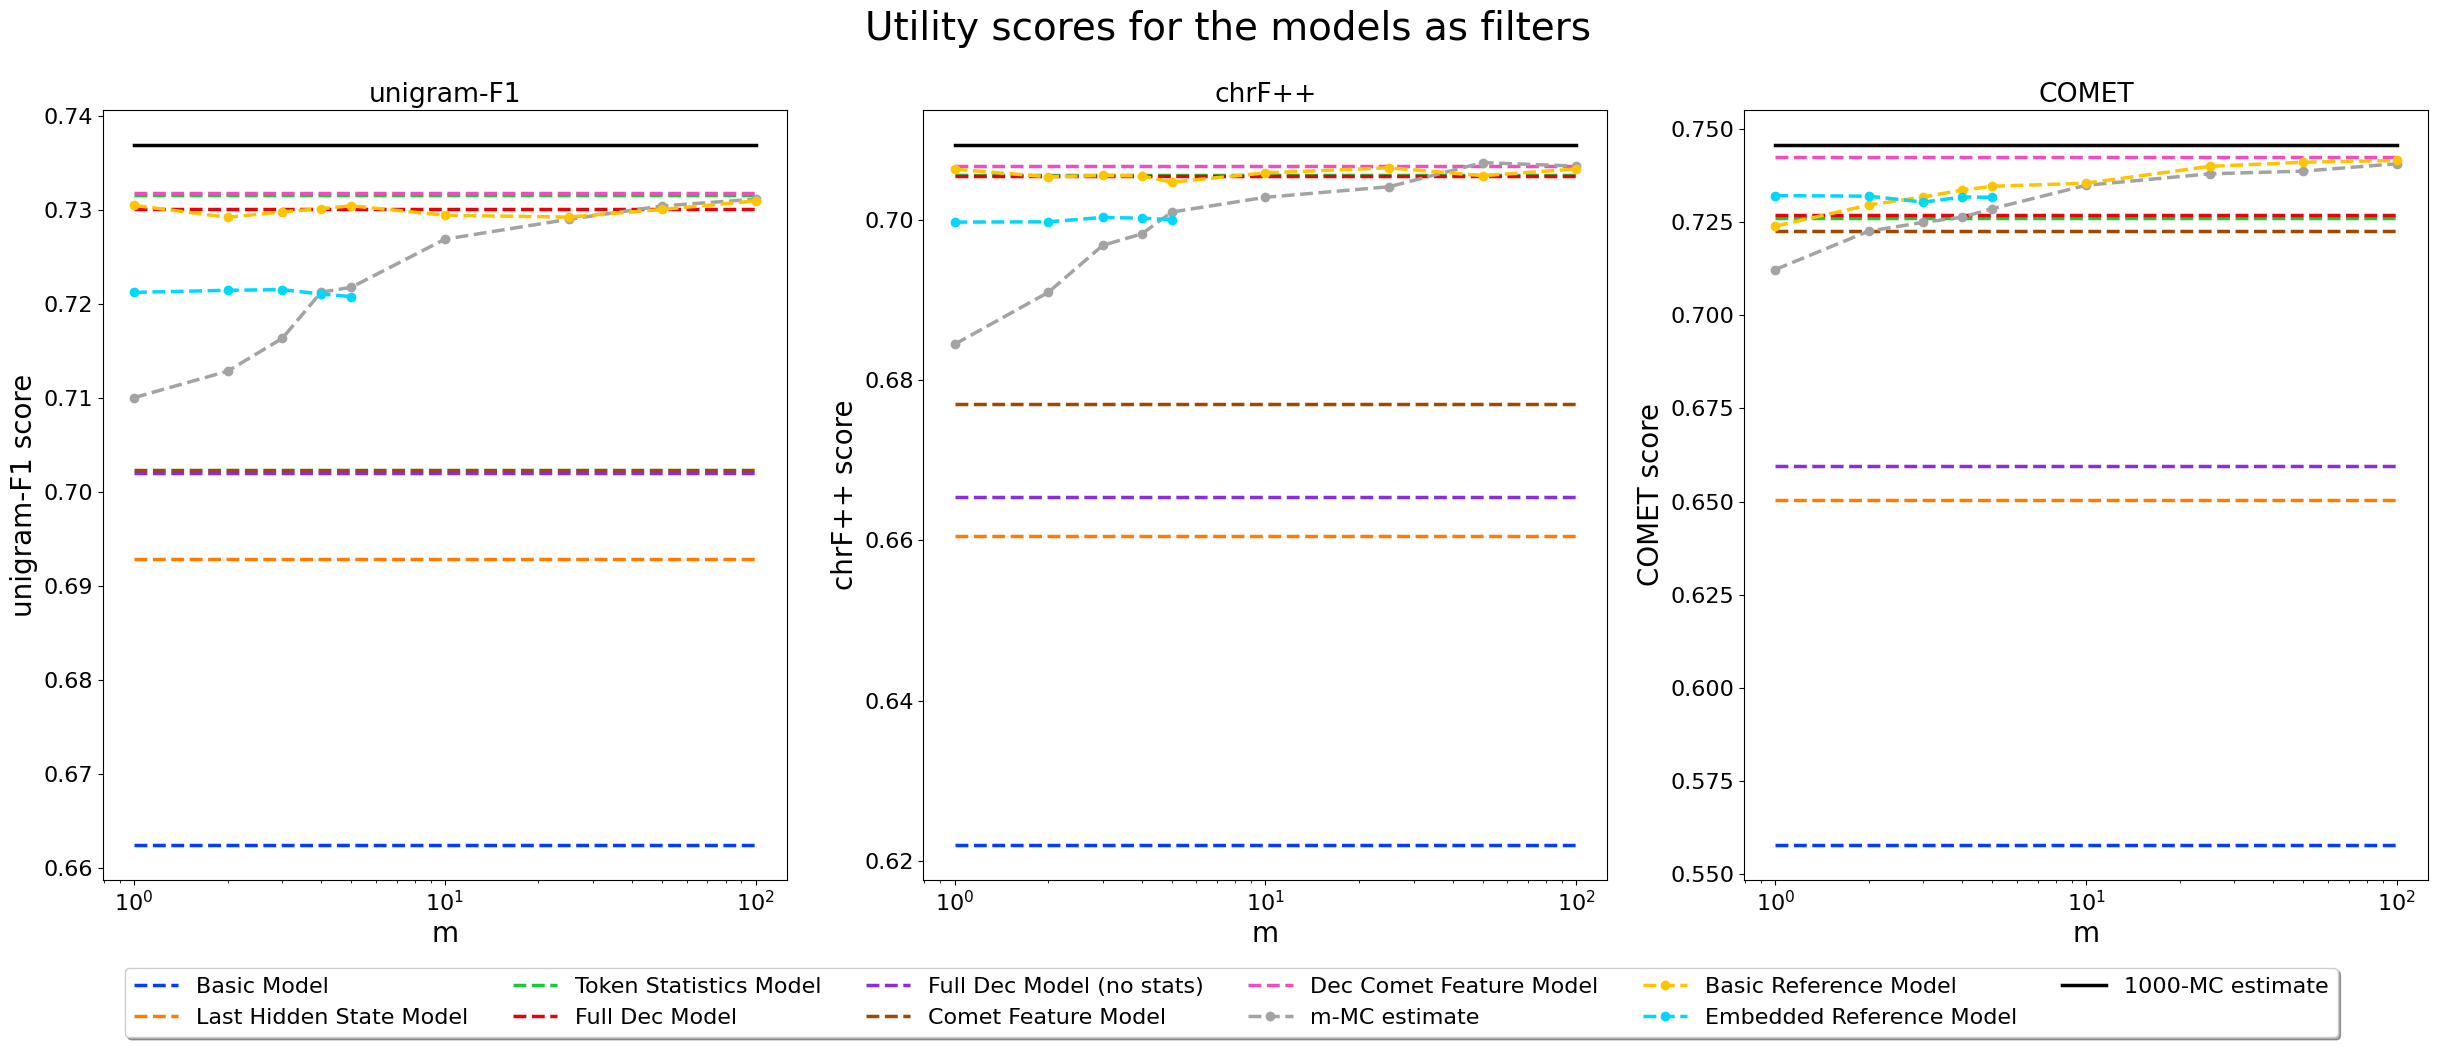

In [13]:
### Create a figure for utilities




utilities = [
    ('unigram-f1', 'unigram-F1'),
    ('chrf', 'chrF++'),
    ('comet', 'COMET'),
]

fig, (axs) = plt.subplots(1, 3, figsize=(30,10))

beam_search_results = get_beam_search_results()

for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'top_10_{}_mean'.format(utility[0].replace('-', '_'))
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    results_1000_mc_estimate = get_result_1000_mc_estimate(utility=utility[0])

    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')


       
#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('{} score'.format(utility[1]),  size=20)
    ax.set_title(utility[1])
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
    #ax.plot(ms, [beam_search_results["{}_mean".format(utility[0].replace('-', '_'))]] * 9, '-', label='beam search', color = 'black', lw=lw)
    
    ax.plot(ms, [results_1000_mc_estimate["{}_mean".format(utility[0].replace('-', '_'))]] * 9, '-', label='1000-MC estimate', color = 'black', lw=lw)
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=6)
fig.suptitle('Utility scores for the models as filters', fontsize=28)
plt.show()

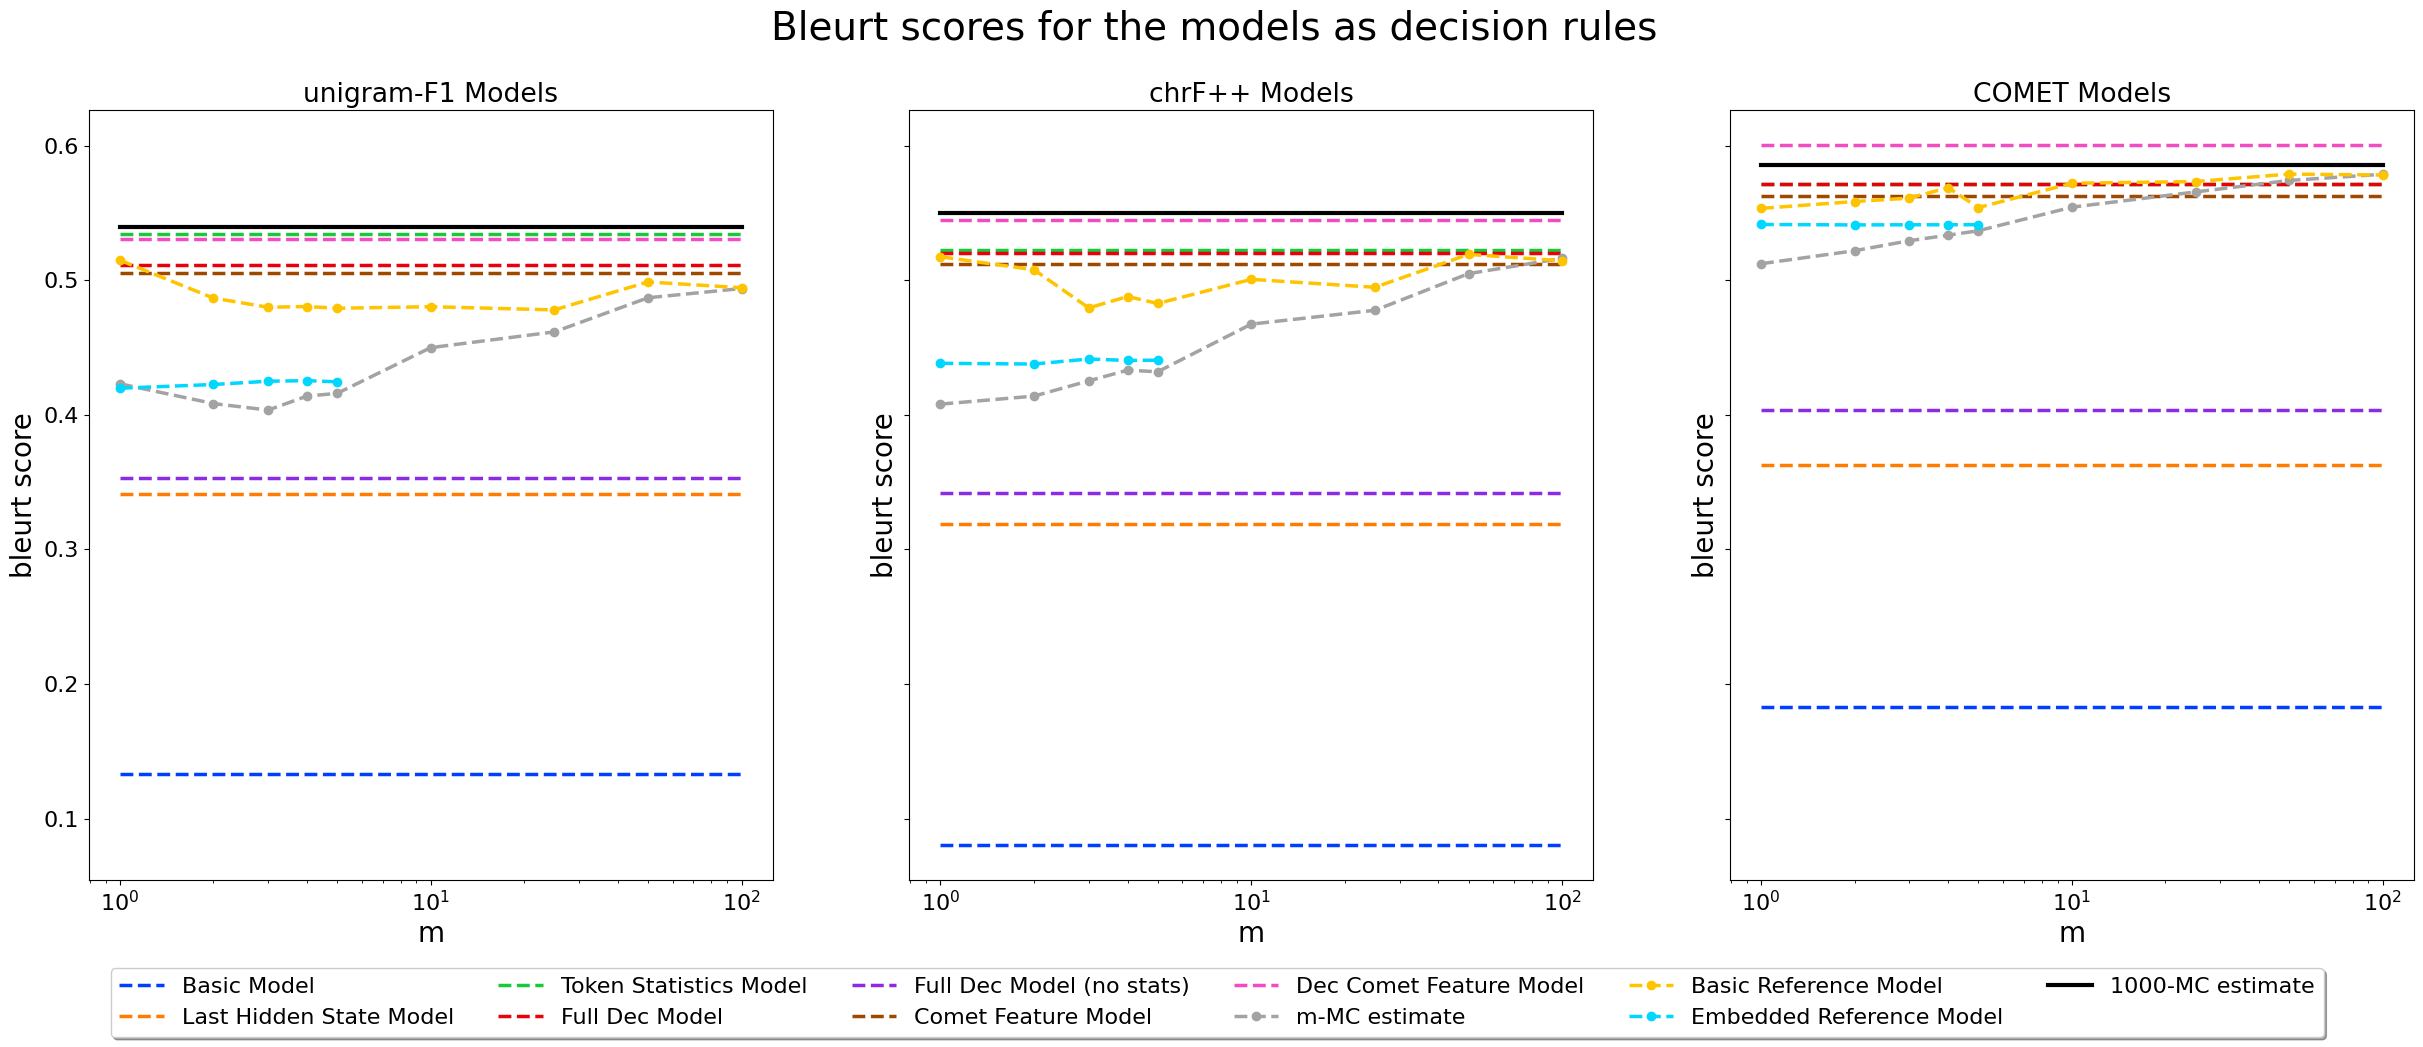

In [14]:
### Create a figure for utilities



utilities = [

    ('unigram-f1', 'unigram-F1'),
    ('chrf', 'chrF++'),
        ('comet', 'COMET'),

]

fig, (axs) = plt.subplots(1, 3, figsize=(30,10), sharey=True)


for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'best_bleurt_mean'
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
    
    
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    results_1000_mc_estimate = get_result_1000_mc_estimate(utility=utility[0])
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('bleurt score'.format(utility[1]),  size=20)
    ax.set_title('{} Models'.format(utility[1]))
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
    #ax.plot(ms, [beam_search_results["bleurt_mean"]] * 9, '-', label='beam search', color = 'black', lw=lw)
    ax.plot(ms, [results_1000_mc_estimate["bleurt_mean"]] * 9, '-', label='1000-MC estimate', color = 'black', lw=lw *1.2)
    
    
    
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=6)
fig.suptitle('Bleurt scores for the models as decision rules', fontsize=28)
plt.show()

Text(0.5, 0.98, 'Bleurt scores for the models as filters')

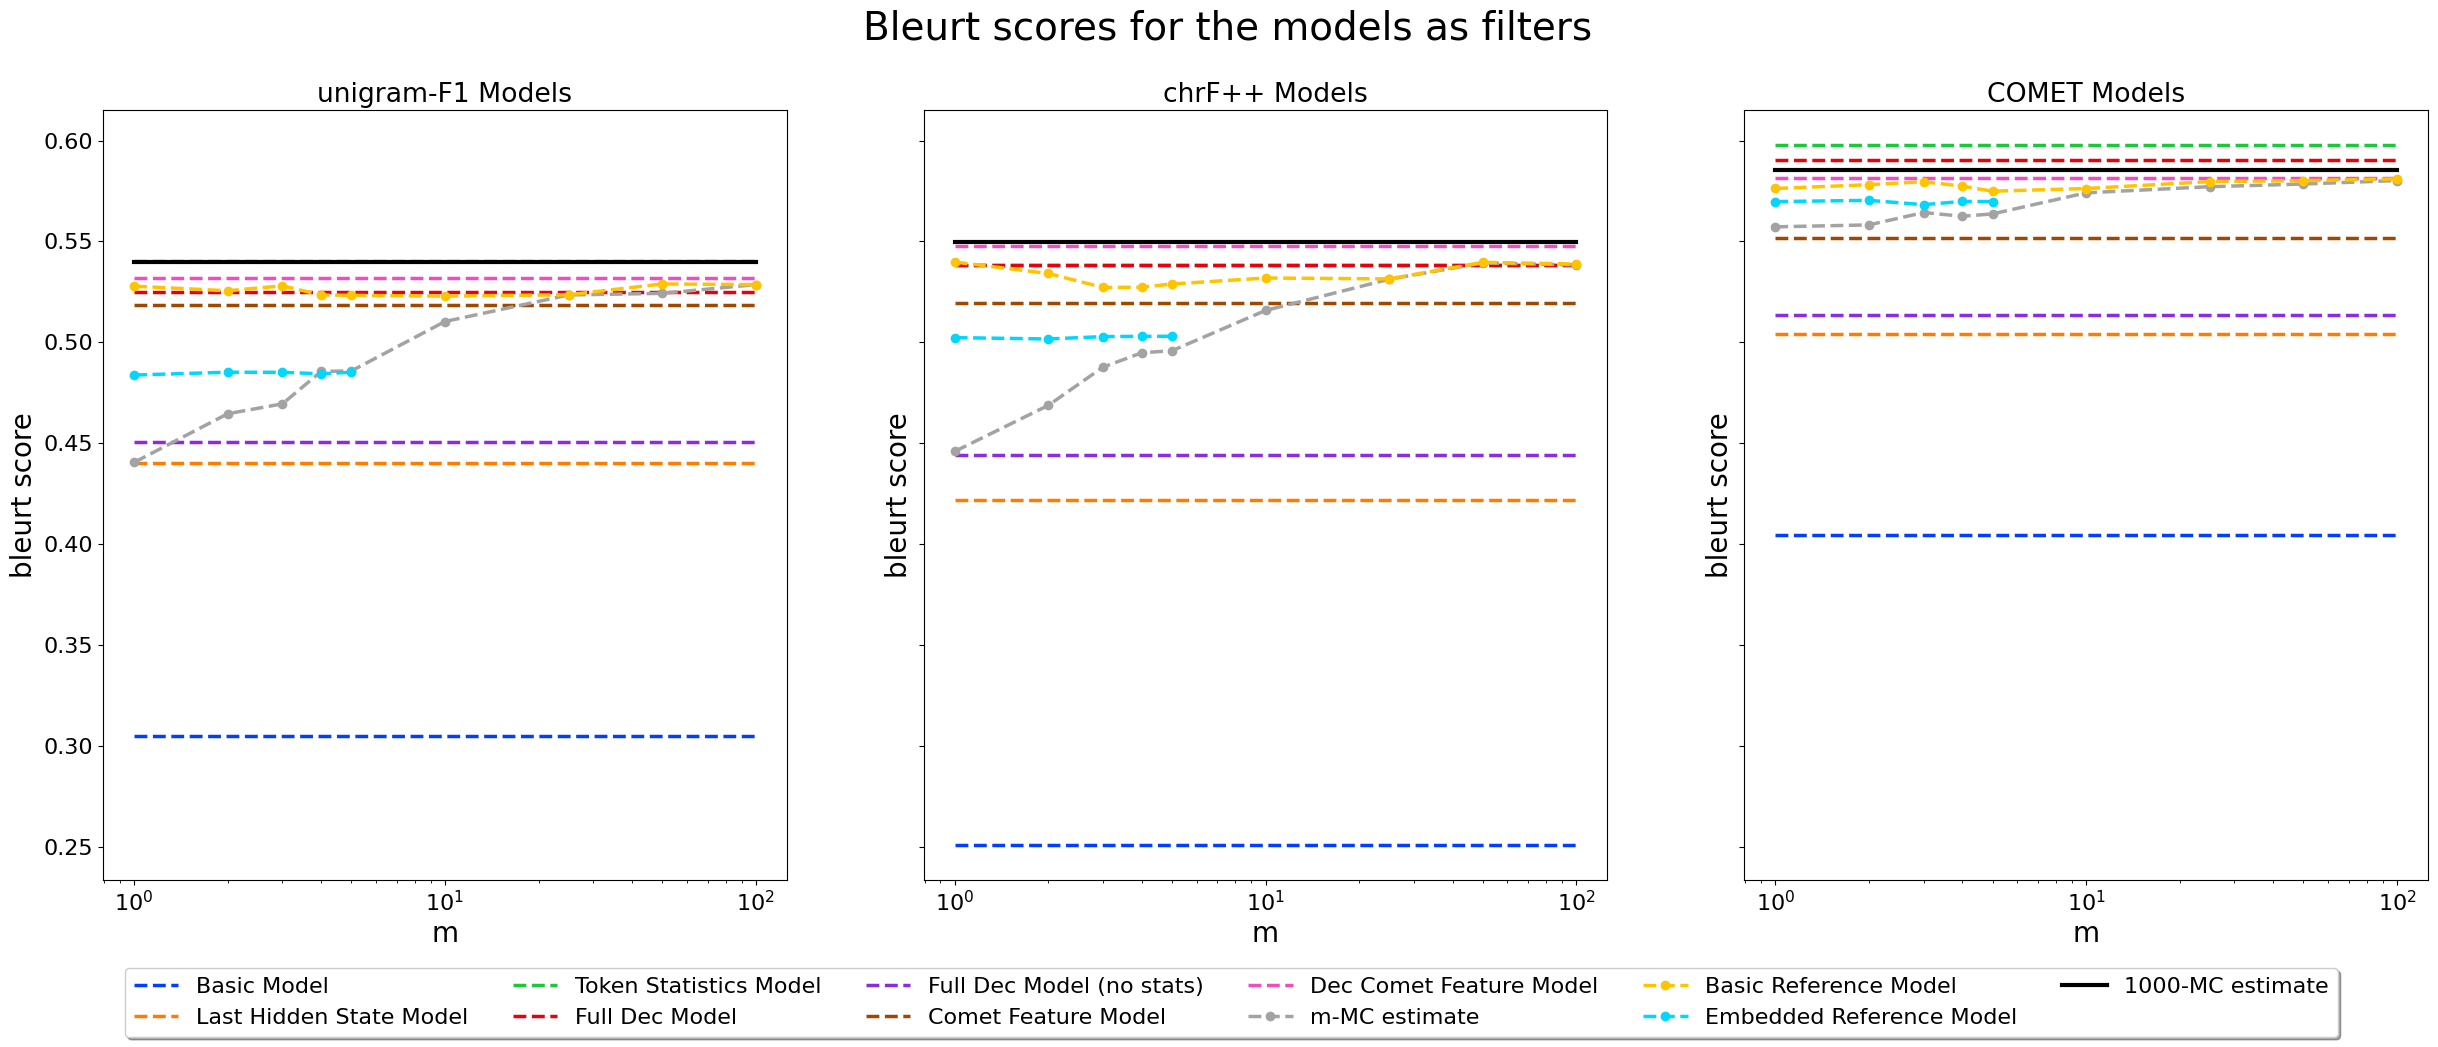

In [15]:
### Create a figure for utilities




utilities = [

    ('unigram-f1', 'unigram-F1'),
    ('chrf', 'chrF++'),
    ('comet', 'COMET'),

]

fig, (axs) = plt.subplots(1, 3, figsize=(30,10), sharey=True)


for i, utility in enumerate(utilities):
    ax = axs[i]
    
    names = [PRETTY_NAMES[name] for name in models]
    
    statistic = 'top_10_bleurt_mean'
    
    ### HERE we gather the statistics
    result_models = load_results_models(models, utility=utility[0])
    statistic_models = [r[statistic] for _, r in result_models.items()]
        
    results_m_mc_estimate = load_result_m_mc_estimate(utility=utility[0])
    statistics_m_mc_estimate = [r[statistic] for _, r in results_m_mc_estimate.items()]
    
    
    results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])
    
    statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]
    
    # Get the results for the basic ref model
    result_unigram_count_model = load_result_unigram_model_estimate(utility=utility[0])
    statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]
    
    results_1000_mc_estimate = get_result_1000_mc_estimate(utility=utility[0])
    
    #### HERE we show the results
    color_palette = itertools.cycle(sns.color_palette('bright'))
    plt.rcParams.update({'font.size': 16})
    
    lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

    lw=2.5
    for line, name, stat in zip(lines, names, statistic_models):
        color = next(color_palette)
        ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
    ax.set_xscale('log')

#     ax.tick_params(axis='both', which='major', labelsize=25)
#     ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.set_xlabel('m',  size=20)
    ax.set_ylabel('bleurt score'.format(utility[1]),  size=20)
    ax.set_title('{} Models'.format(utility[1]))
    
    ax.plot(ms, statistics_m_mc_estimate, '--o', label='m-MC estimate', lw=lw, color=next(color_palette))
    ax.plot(ms, statistics_reference_model, '--o',  label='Basic Reference Model', lw=lw, color=next(color_palette))
    ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
    
    #ax.plot(ms, [beam_search_results["bleurt_mean"]] * 9, '-', label='beam search', color = 'black', lw=lw)
    ax.plot(ms, [results_1000_mc_estimate["bleurt_mean"]] * 9, '-', label='1000-MC estimate', color = 'black', lw=lw *1.2)
    
    
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=6)
fig.suptitle('Bleurt scores for the models as filters', fontsize=28)

In [ ]:
### Next we map the 